# Data analysis tools for the AlpiLink Dataset

- Author: D'Ambrosi Denis
- Institution: Scuola Superiore Universitaria di Toppo Wassermann, Udine, Italy
- Date: April 2024

**Index:**

1. Defaults
2. Data preprocessing
3. Data distribution analysis

    3.1 Audio lengths

    3.2 Audio bitrates
    
    3.3 Distribution across tasks and/or dialects


---

Cite:

```
@misc{dambrosi2024alpilink
    title = 'Data analysis tools for the Alpilink Dataset',
    author = {D'Ambrosi, Denis},
    month = 'Apr',
    year = '2024',
    howpublished = '\url{https://github.com/dambrosidenis/AlpiLinK-Data-Analysis}
}
```

### 1: Defaults

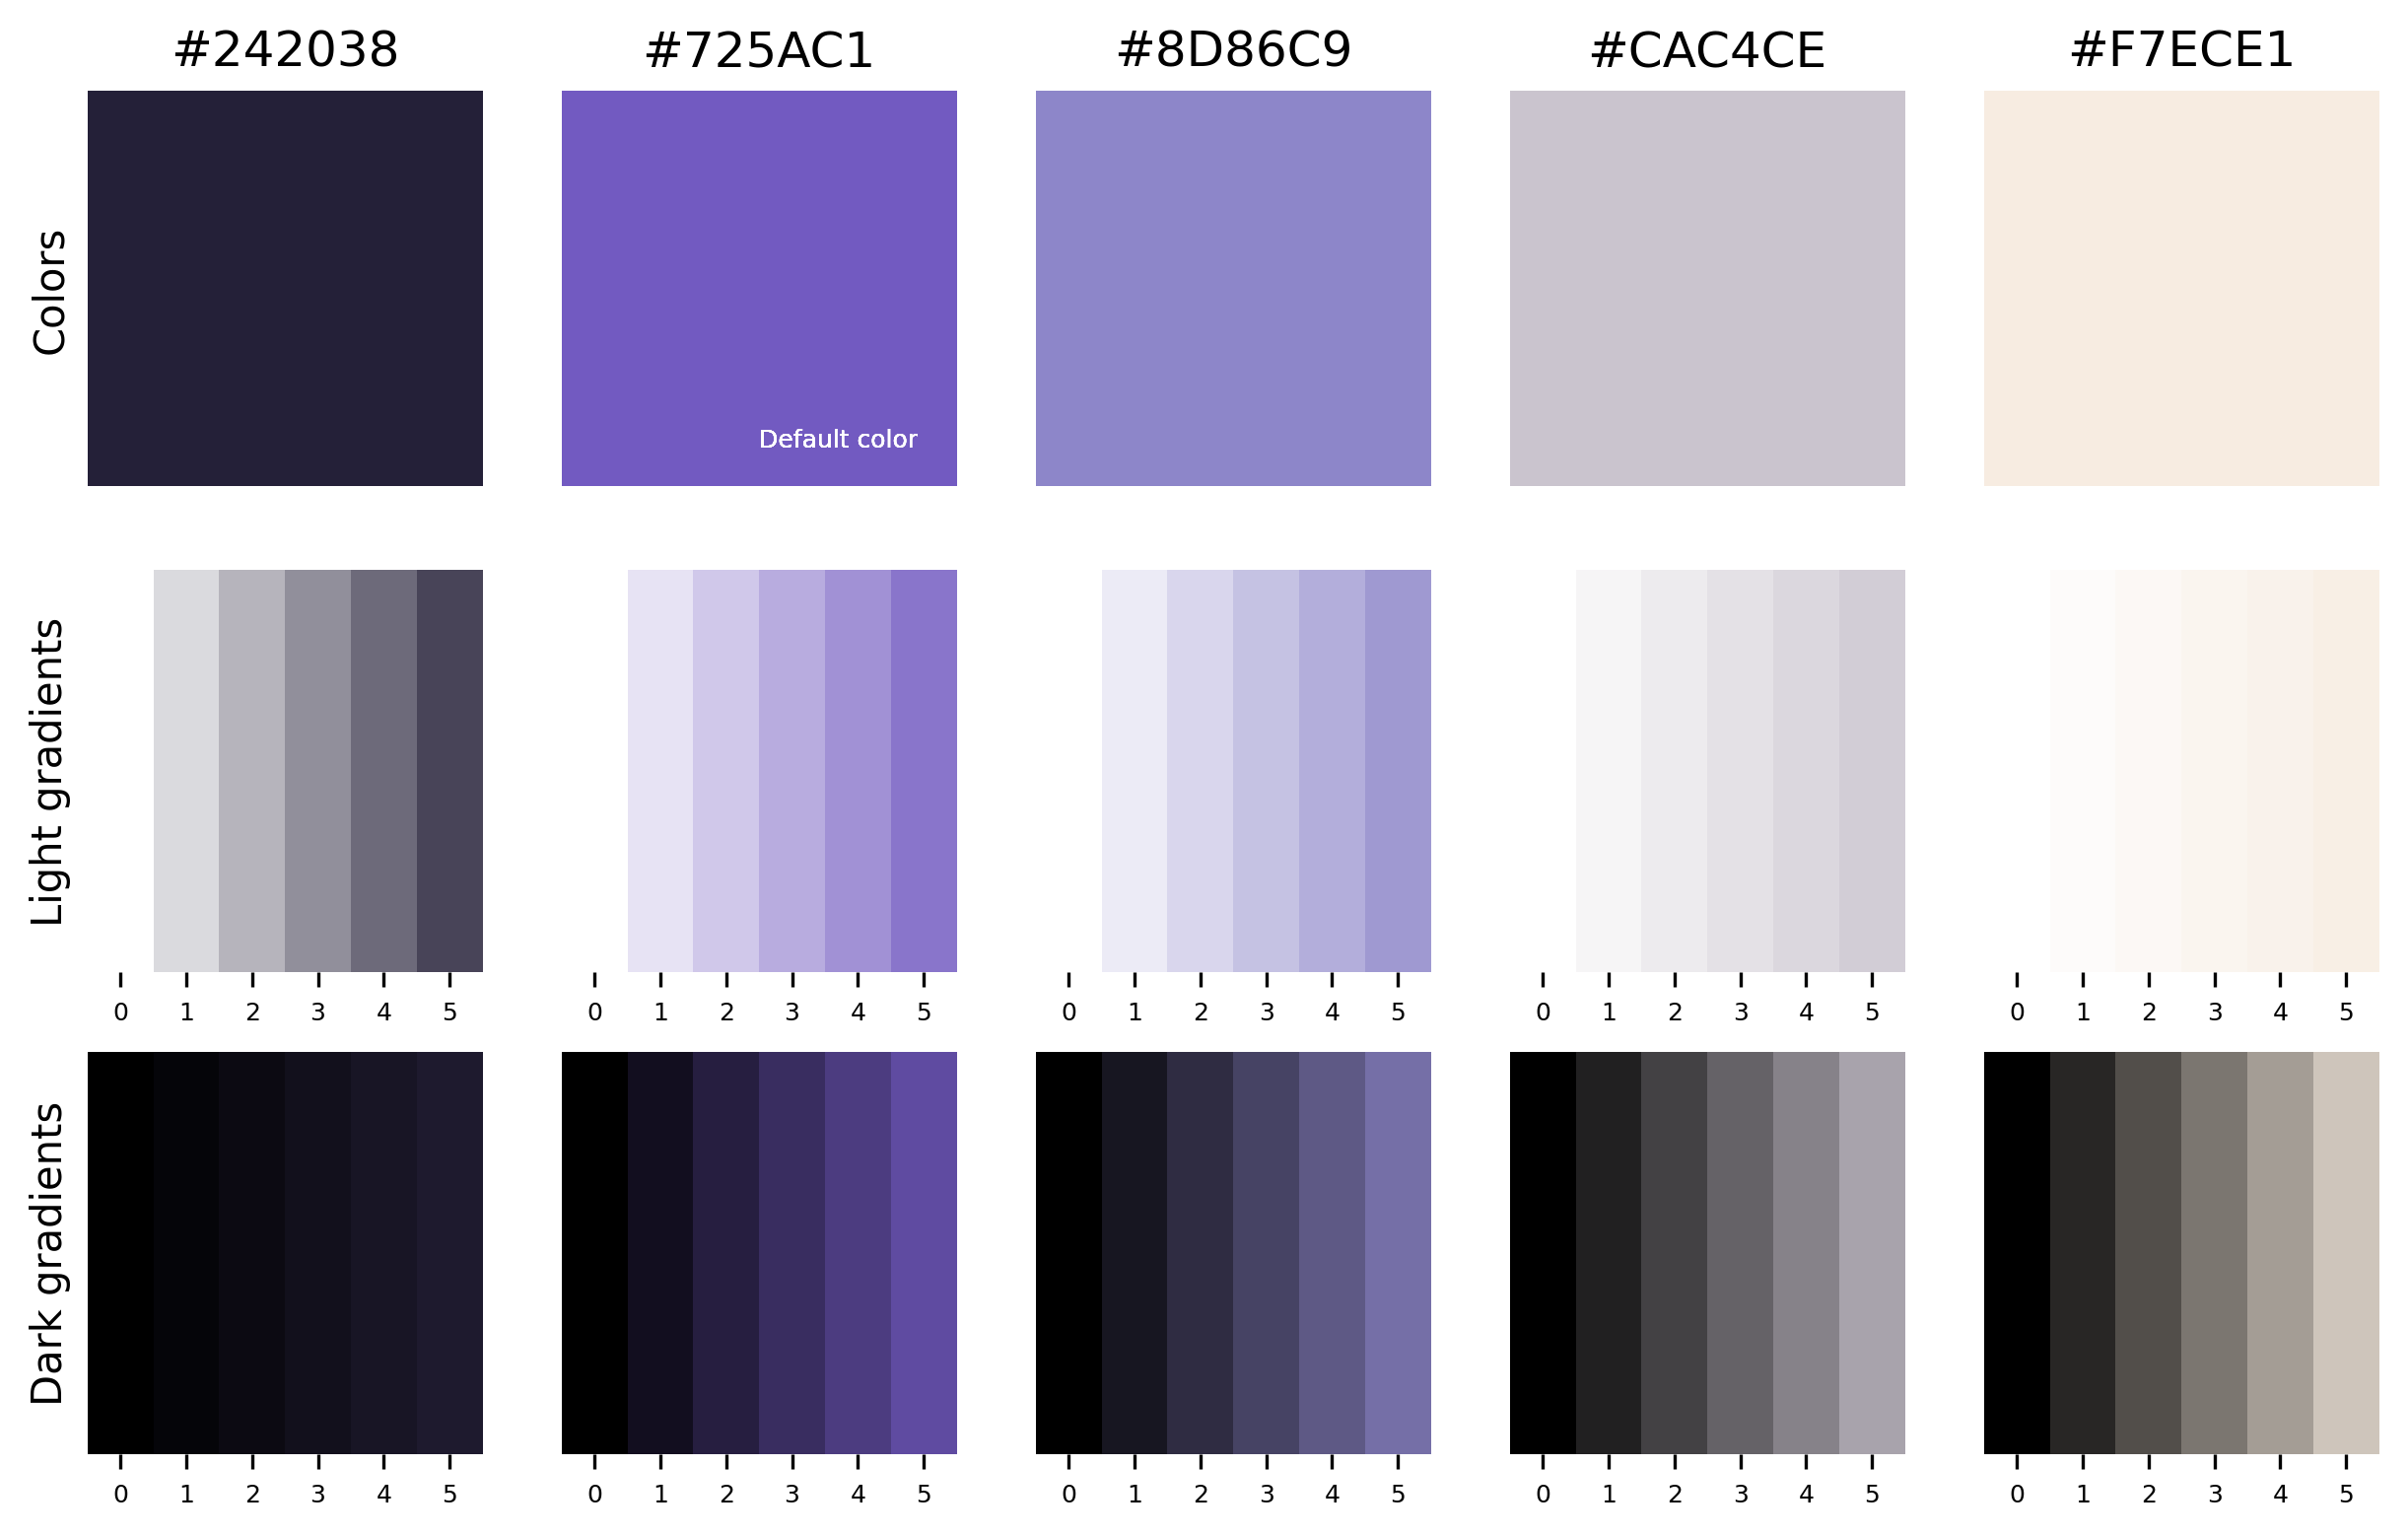

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

TITLE_FONTSIZE = 16
AXES_TITLE_FONTSIZE = 12
AXES_LABEL_FONTSIZE = 10
AXES_TICKS_FONTSIZE = 6
TEXT_FONTSIZE = 6
DPI = 300

PALETTE = ['#242038', '#725AC1', '#8D86C9', '#CAC4CE', '#F7ECE1']
GRADIENTS_LIGHT = list(map(lambda col : LinearSegmentedColormap.from_list('default', ['#FFFFFF', col]), PALETTE))
GRADIENTS_DARK = list(map(lambda col : LinearSegmentedColormap.from_list('default', ['#000000', col]), PALETTE))

DEFAULT_COLOR_IDX = 1
DEFAULT_COLOR = PALETTE[DEFAULT_COLOR_IDX]
DEFAULT_CMAP = GRADIENTS_LIGHT[DEFAULT_COLOR_IDX]
TEXT_COLOR = '#FFFFFF'

fig, axes = plt.subplots(3, len(PALETTE),figsize=(10,6), dpi=DPI)

gradient_max = 6
gradient = list(range(gradient_max))

# Display the colors
for idx, color in enumerate(PALETTE) :
    axes[0][idx].imshow([[1]], vmin=0, vmax=1, cmap = GRADIENTS_LIGHT[idx])
    axes[0][idx].spines[['right', 'top', 'left', 'bottom']].set_visible(False)
    axes[0][idx].set_xticks([],[])
    axes[0][idx].set_yticks([],[])
    axes[0][idx].set_title(color, fontsize=AXES_TITLE_FONTSIZE)

# Display the light gradients
    axes[1][idx].imshow([gradient], vmin=0, vmax=gradient_max, cmap = GRADIENTS_LIGHT[idx], aspect='auto')
    axes[1][idx].spines[['right', 'top', 'left', 'bottom']].set_visible(False)
    axes[1][idx].spines[['right', 'top', 'left', 'bottom']].set_visible(False)
    axes[1][idx].set_xticks(gradient, gradient, fontsize=AXES_TICKS_FONTSIZE)
    axes[1][idx].set_yticks([],[])

# Display the dark gradients
    axes[2][idx].imshow([gradient], vmin=0, vmax=gradient_max, cmap = GRADIENTS_DARK[idx], aspect='auto')
    axes[2][idx].spines[['right', 'top', 'left', 'bottom']].set_visible(False)
    axes[2][idx].set_xticks(gradient, gradient, fontsize=AXES_TICKS_FONTSIZE)
    axes[2][idx].set_yticks([],[])

# Display the row labels
    axes[0][0].set_ylabel('Colors', fontsize=AXES_LABEL_FONTSIZE)
    axes[1][0].set_ylabel('Light gradients', fontsize=AXES_LABEL_FONTSIZE)
    axes[2][0].set_ylabel('Dark gradients', fontsize=AXES_LABEL_FONTSIZE)

# Display the default color
    axes[0][DEFAULT_COLOR_IDX].text(0, 0.4, 'Default color', fontsize=TEXT_FONTSIZE, color=TEXT_COLOR)

### 2: Audio preprocessing

In [2]:
import librosa

def load_and_preprocess_audio(file_path, n_fft = 2048, hop_length = 512, n_mels = 128, n_mfcc = 10):
    # Load the audio file
    audio, sr = librosa.load(file_path, sr=None)
    time = librosa.times_like(audio, sr=sr)
    
    # Convert audio to spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    
    return audio, time, spectrogram, spectrogram_db, mfccs

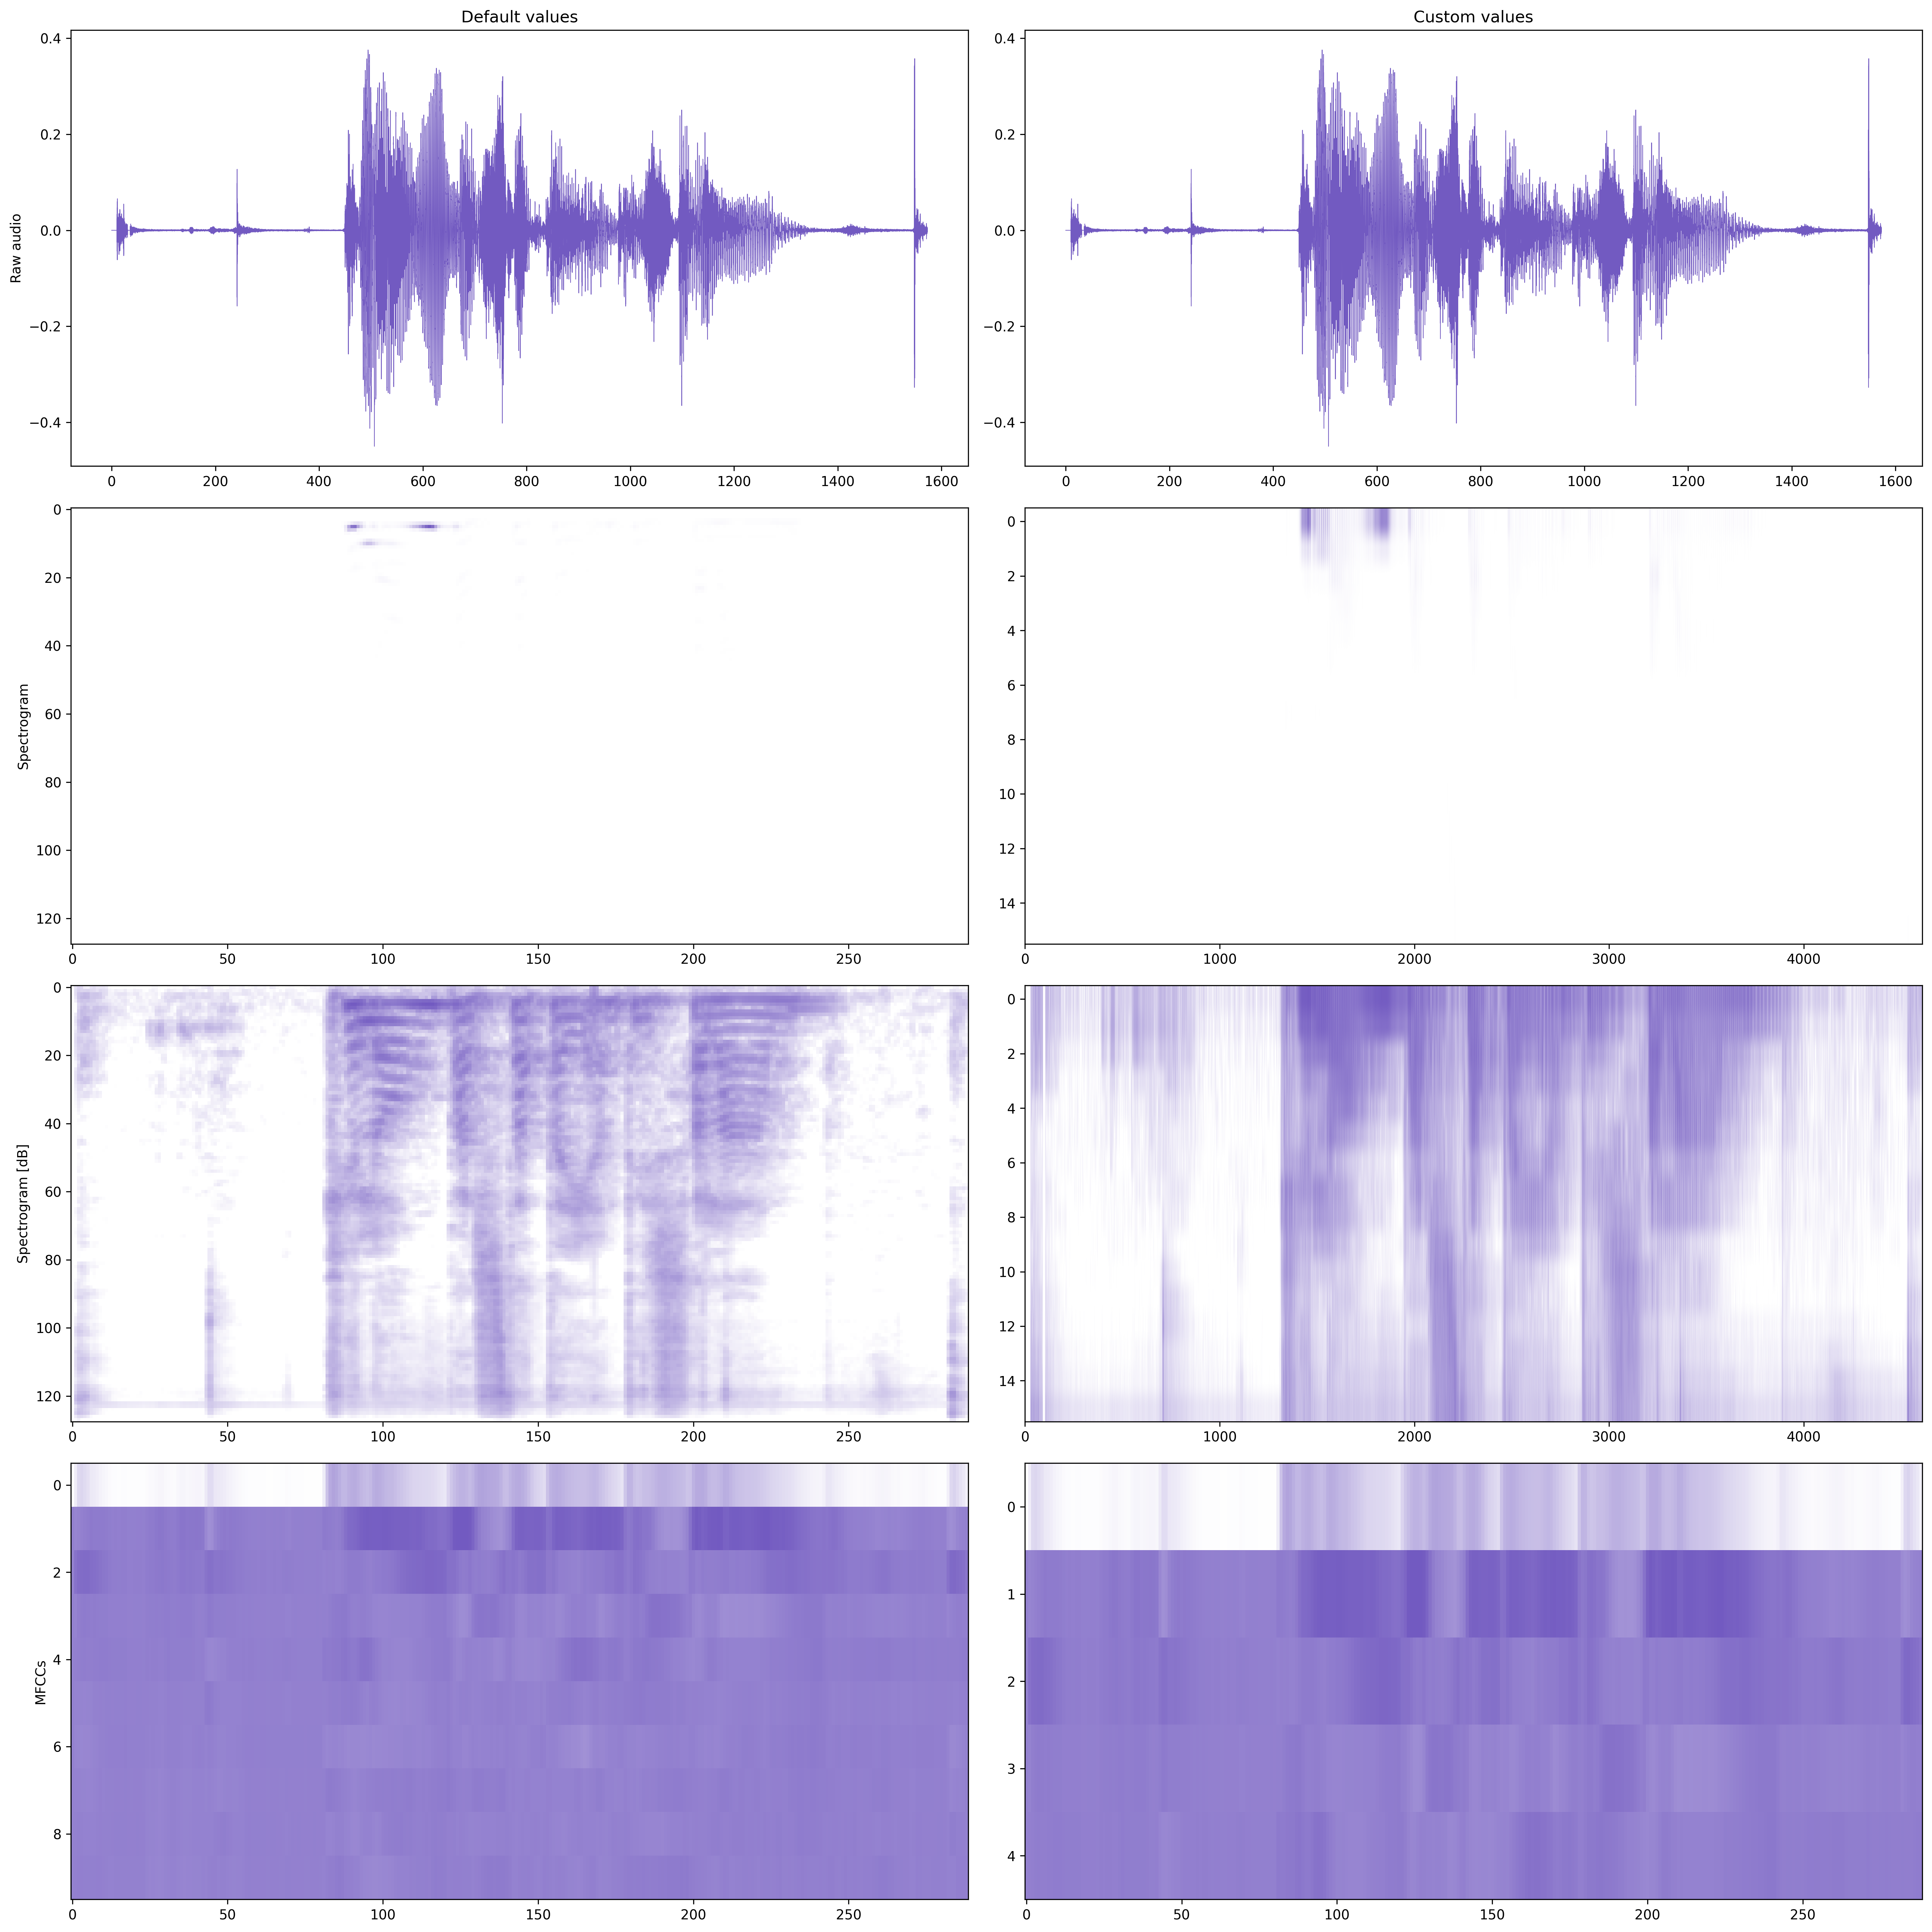

In [3]:
fig, axs = plt.subplots(4,2, figsize = (20, 20), dpi=DPI)

EXAMPLE_FILE = './friulano/I01_fur_U0175.wav'

# Left column
audio, time, spectrogram, spectrogram_db, mfccs = load_and_preprocess_audio(EXAMPLE_FILE)
axs[0][0].set_title('Default values', fontsize = AXES_TITLE_FONTSIZE)
axs[0][0].plot(time, audio, color=DEFAULT_COLOR, linewidth = 0.5)
axs[1][0].imshow(spectrogram, aspect='auto', cmap=DEFAULT_CMAP)
axs[2][0].imshow(spectrogram_db, aspect='auto', cmap=DEFAULT_CMAP)
axs[3][0].imshow(mfccs, aspect='auto', cmap=DEFAULT_CMAP)
axs[0][0].set_ylabel('Raw audio', fontsize = AXES_LABEL_FONTSIZE)
axs[1][0].set_ylabel('Spectrogram', fontsize = AXES_LABEL_FONTSIZE)
axs[2][0].set_ylabel('Spectrogram [dB]', fontsize = AXES_LABEL_FONTSIZE)
axs[3][0].set_ylabel('MFCCs', fontsize = AXES_LABEL_FONTSIZE)

# Right column
audio, time, spectrogram, spectrogram_db, mfccs = load_and_preprocess_audio(EXAMPLE_FILE, n_fft = 256, hop_length = 32, n_mels = 16, n_mfcc = 5)
axs[0][1].set_title('Custom values', fontsize = AXES_TITLE_FONTSIZE)
axs[0][1].plot(time, audio, color=DEFAULT_COLOR, linewidth = 0.5)
axs[1][1].imshow(spectrogram, aspect='auto', cmap=DEFAULT_CMAP)
axs[2][1].imshow(spectrogram_db, aspect='auto', cmap=DEFAULT_CMAP)
axs[3][1].imshow(mfccs, aspect='auto', cmap=DEFAULT_CMAP)

plt.tight_layout()
plt.show()

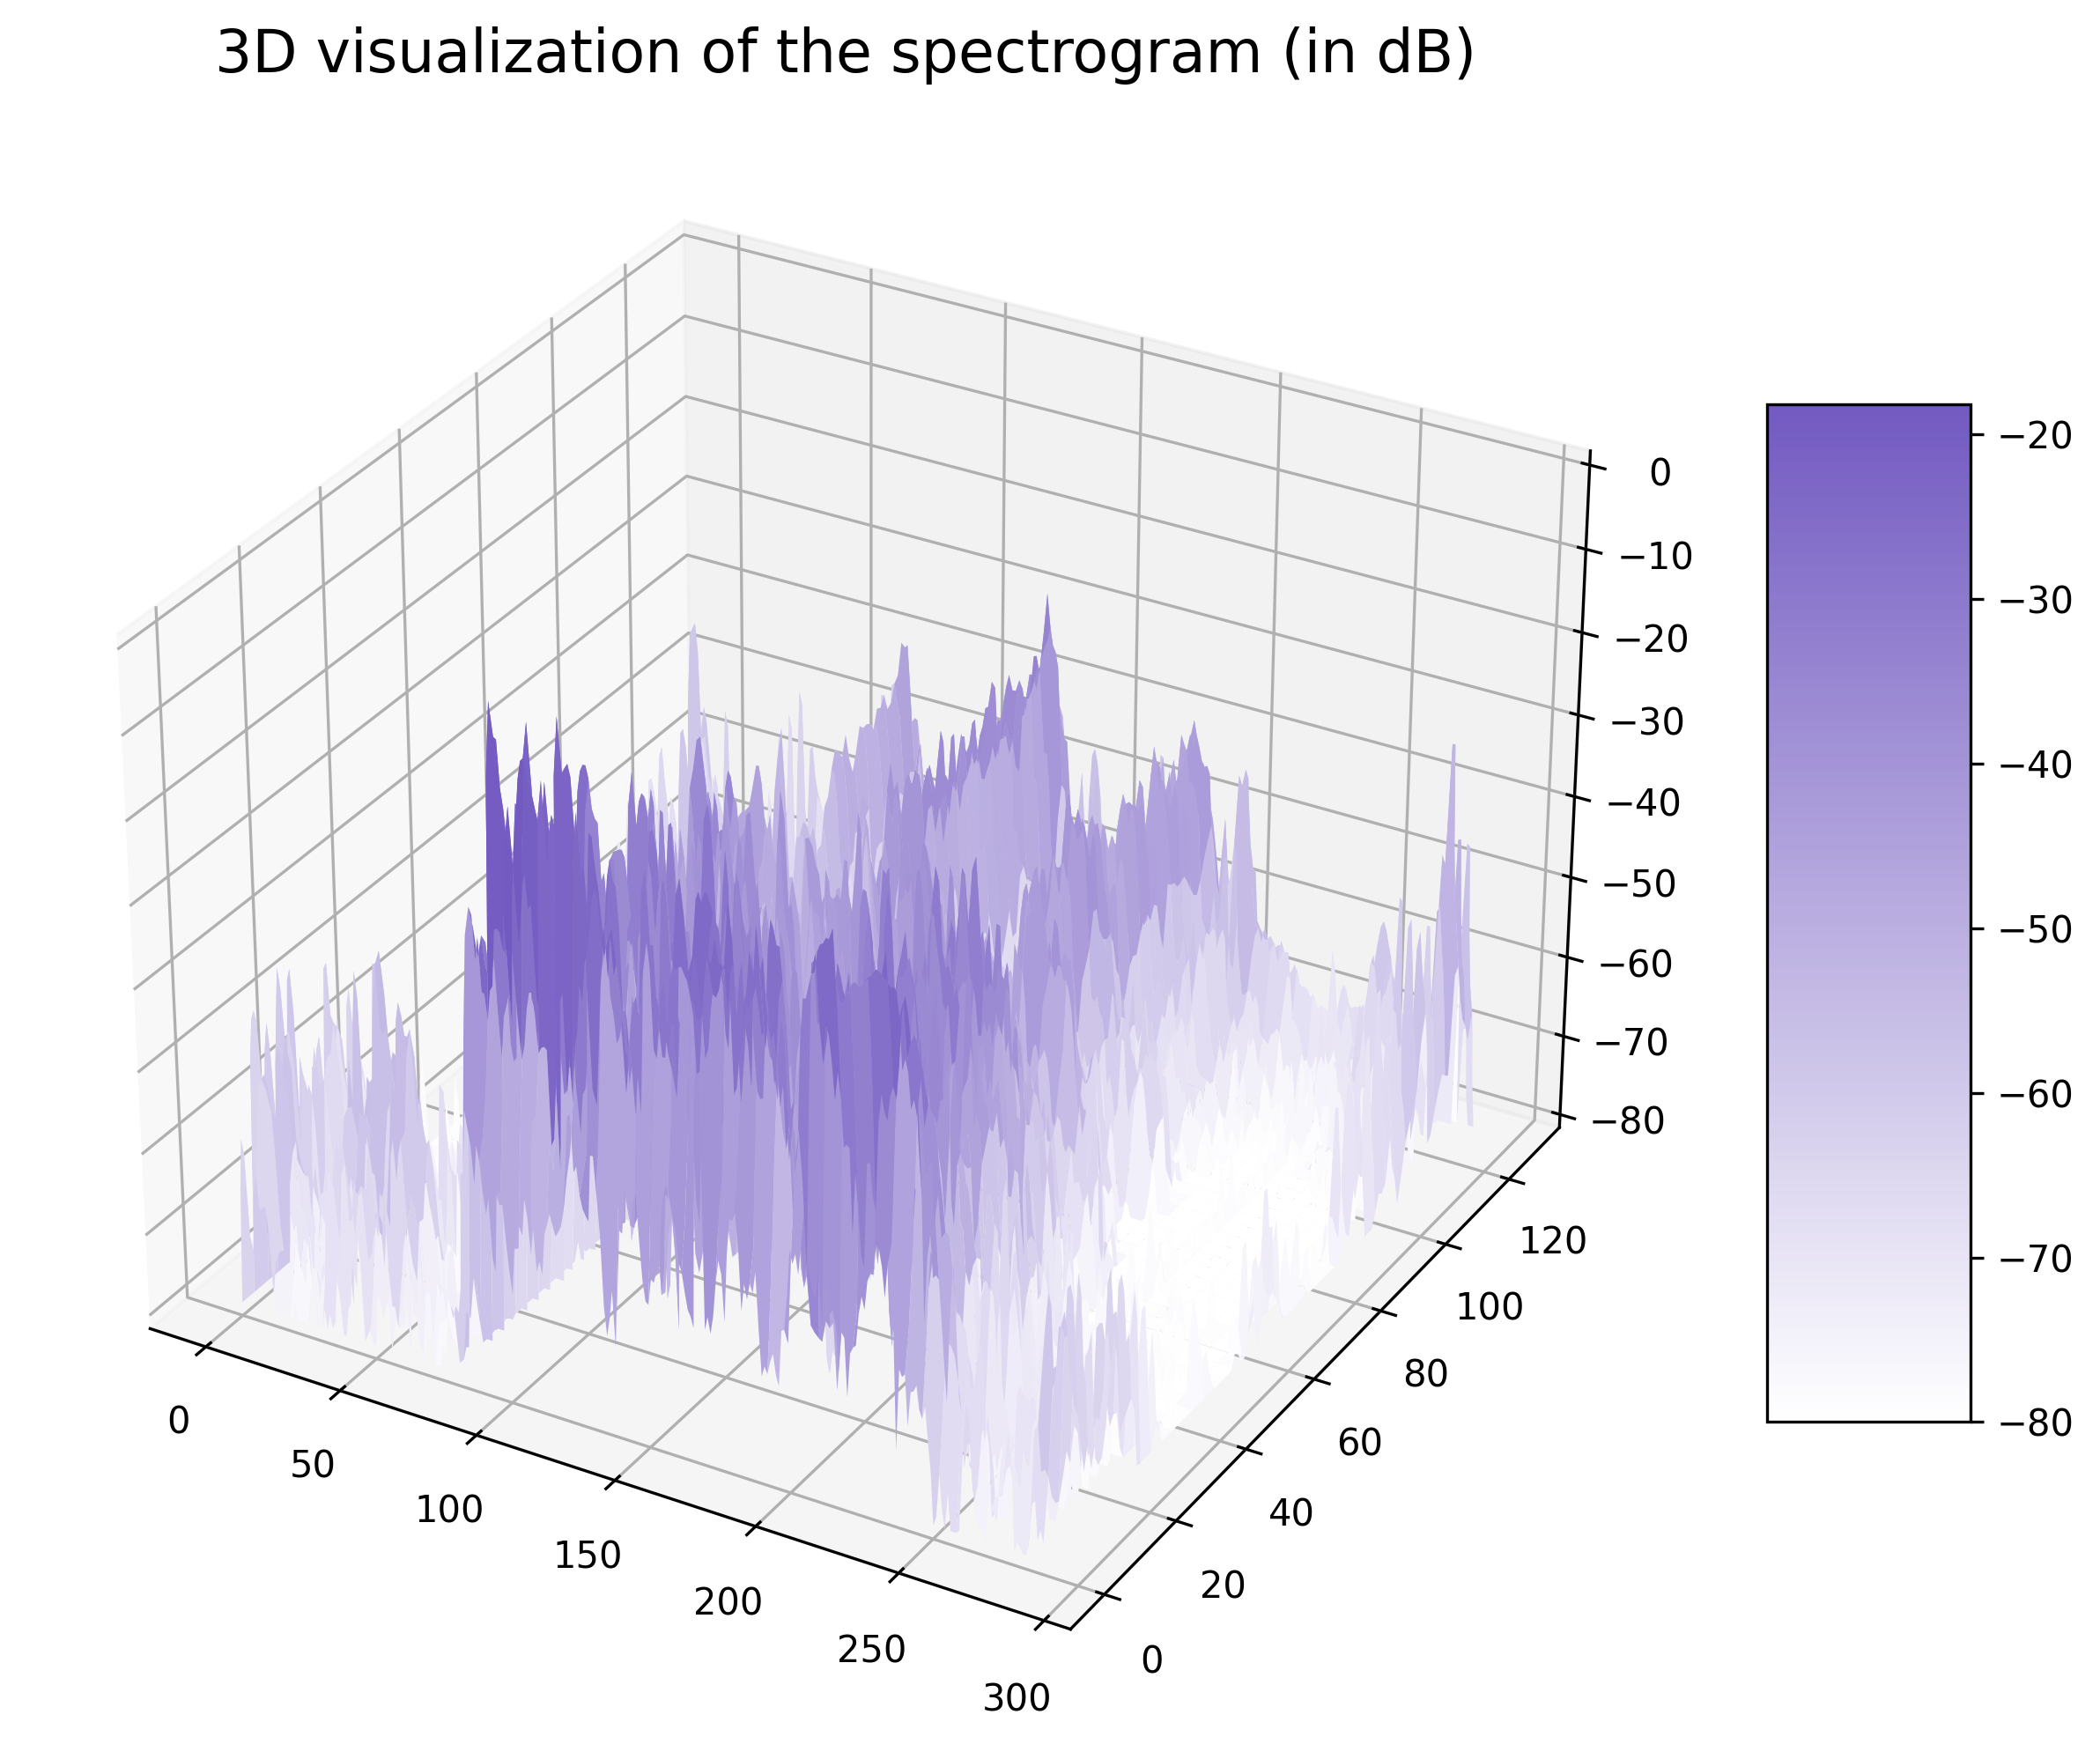

In [4]:
audio, time, spectrogram, spectrogram_db, mfccs = load_and_preprocess_audio(EXAMPLE_FILE)

# Create X and Y indices
x = np.arange(spectrogram_db.shape[1])
y = np.arange(spectrogram_db.shape[0])
X, Y = np.meshgrid(x, y)

# Create a figure and a 3D subplot
fig = plt.figure(figsize = (10,10), dpi = DPI)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, spectrogram_db, cmap=DEFAULT_CMAP)

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5, cmap=DEFAULT_CMAP)

plt.title('3D visualization of the spectrogram (in dB)', fontsize = TITLE_FONTSIZE)

plt.show()

### 3: Data distribution

In [35]:
from os import listdir
from os.path import isfile, join
import wave
import os

# By default, we assume that each folder within the current folder is a dialect that we want to analyze
# If this was not the case, it is enough to set DIALECTS to the list of names of folders with the relevant data
#       e.g: DIALECTS = [ 'friulano', 'occitano', 'tirolese' ]
DIALECTS = list(os.walk('.'))[0][1]
DIALECTS = DIALECTS[:-2] + DIALECTS[-1:]
TASKS = [ 'M', 'S', 'I', 'T', 'N', 'G' ]
DEFAULT_DISPLAY_SHAPE = (int(np.ceil(len(DIALECTS)/2)), 2) if len(DIALECTS) > 3 else (len(DIALECTS), 1)
COMPARABLE = True

#### 3.1: Audio lengths

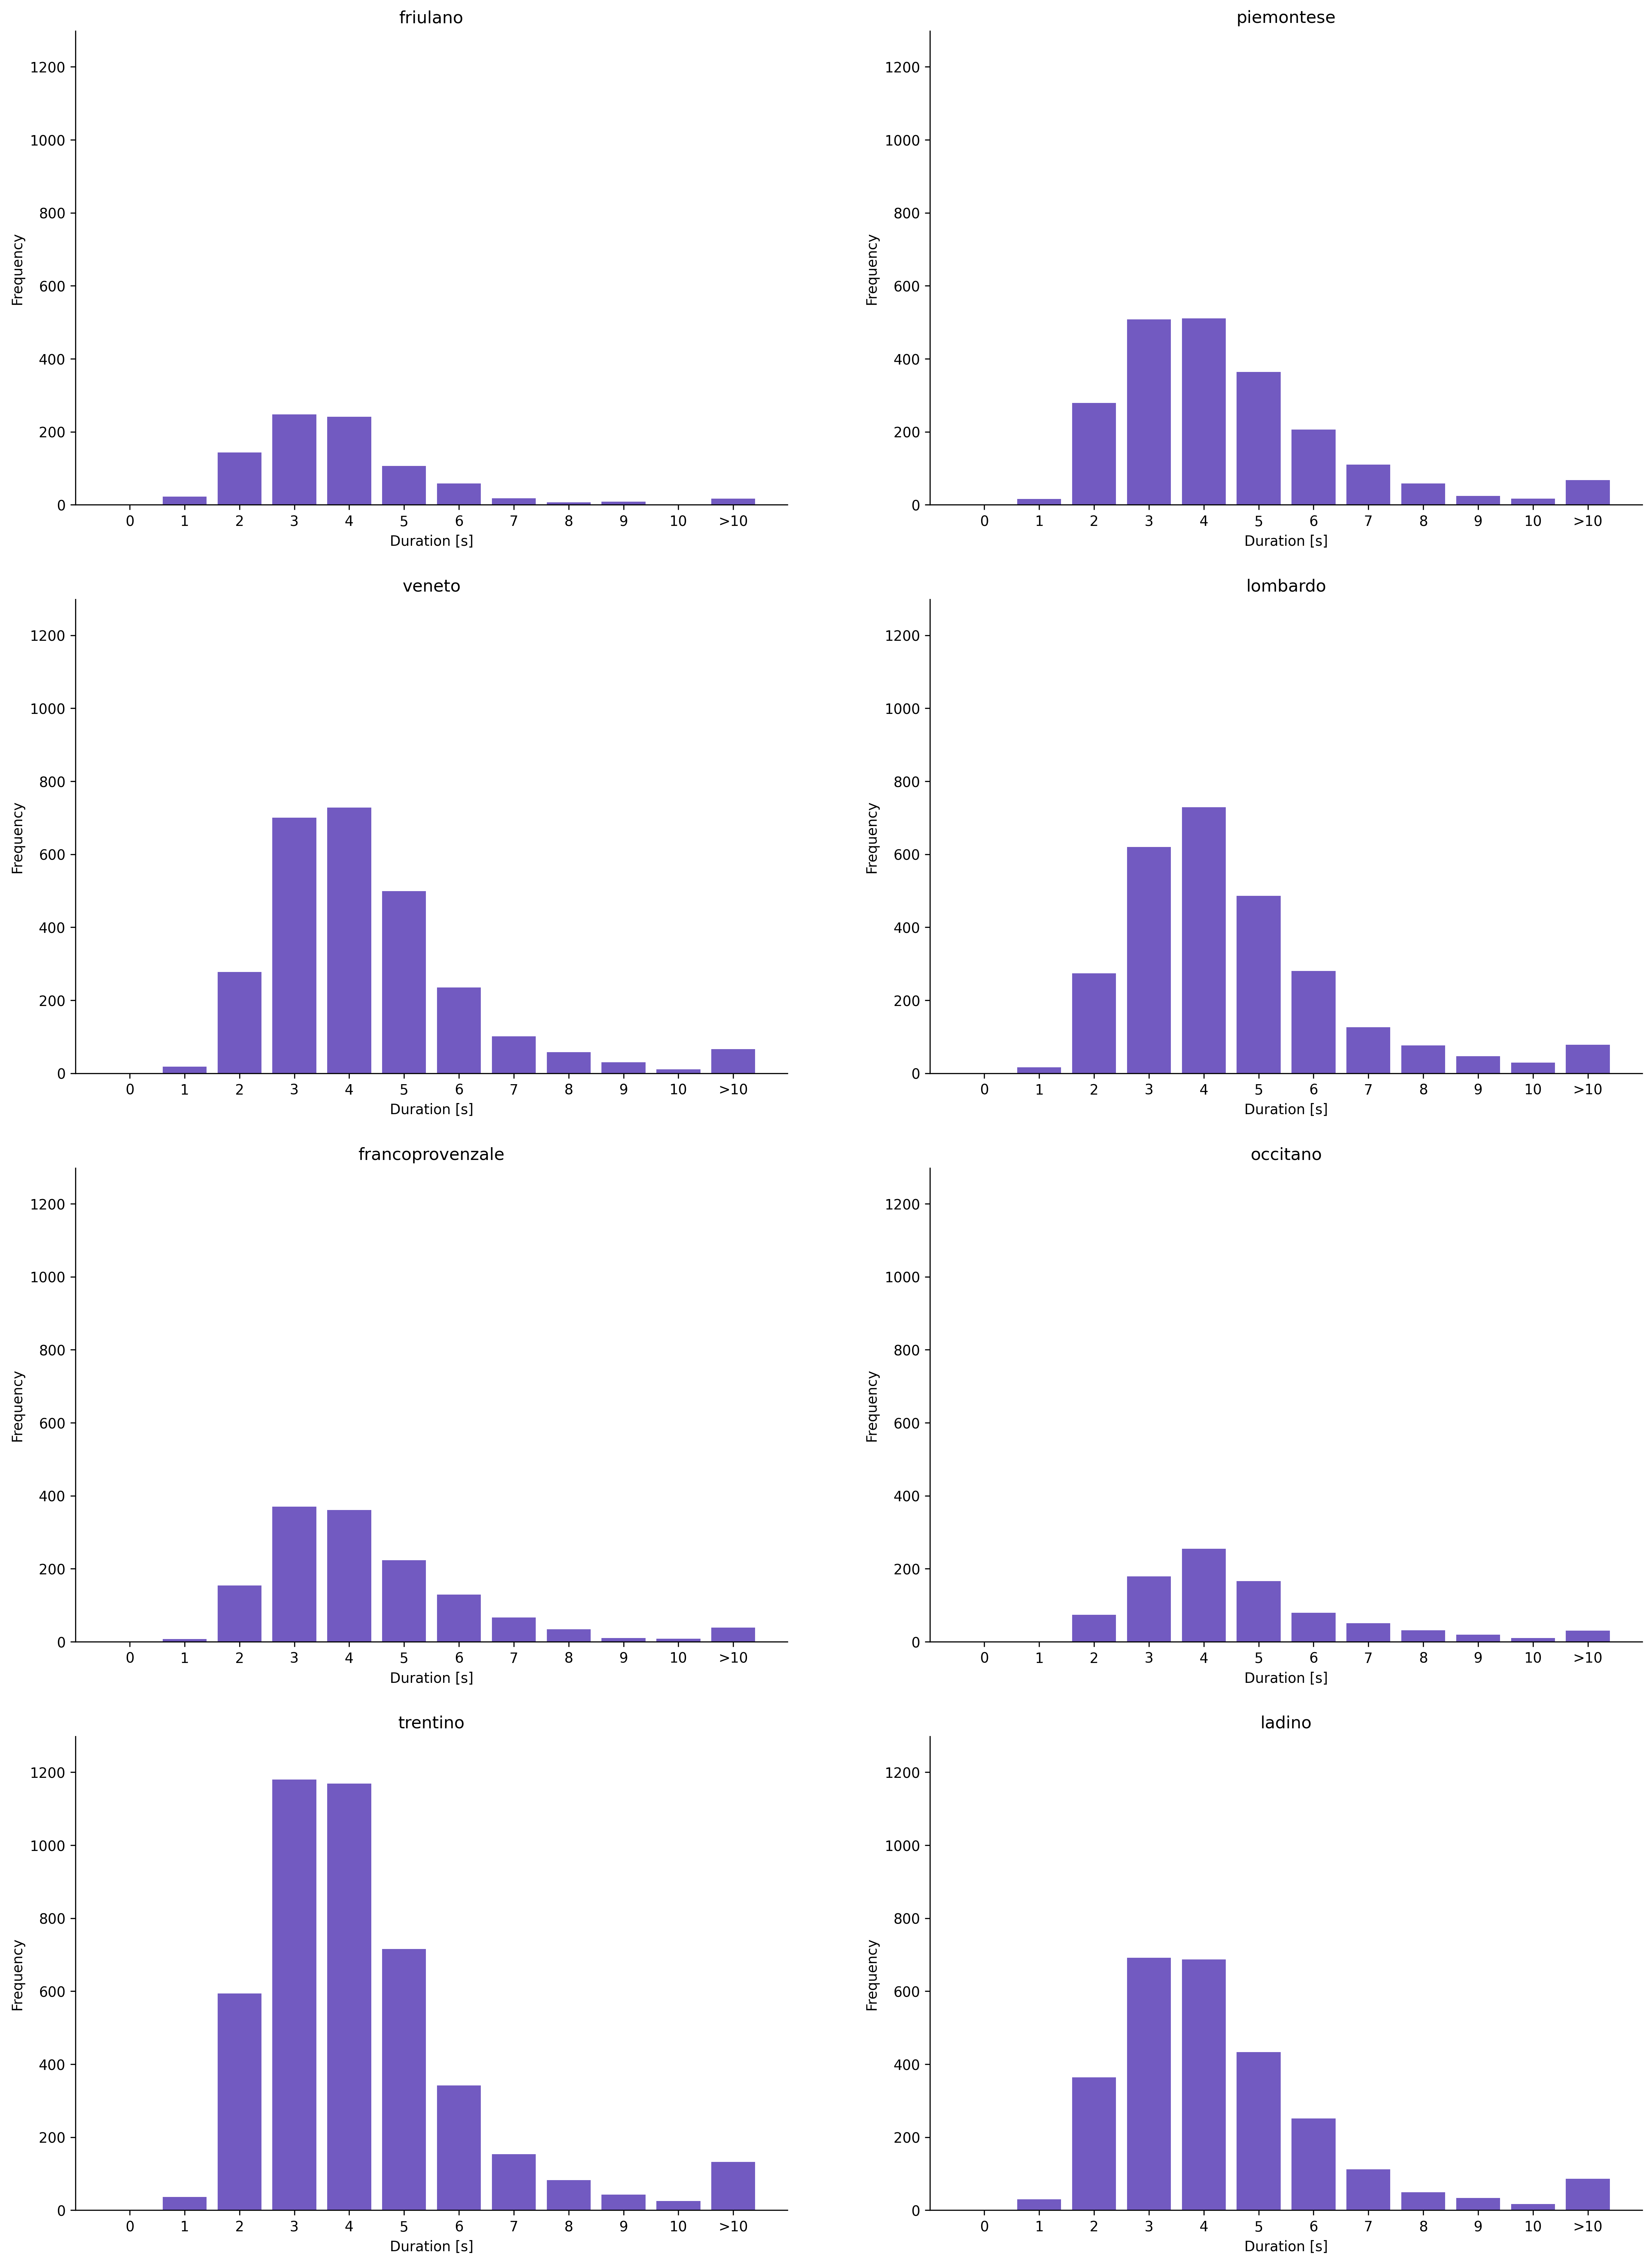

In [36]:
fig, axs = plt.subplots(*DEFAULT_DISPLAY_SHAPE, figsize = (DEFAULT_DISPLAY_SHAPE[1]*10, DEFAULT_DISPLAY_SHAPE[0]*7), dpi = DPI)

xAxis = [ str(i) for i in range(11) ] + ['>10']
maxFrequency = 0
dialectDurations = dict()

# Scan the dataset. We assume that each dialect's data is stored in a separated folder with the same name of the dialect
for dialect in DIALECTS :
    dirPath = f'./{dialect}/'
    # Isolate the files within the folder
    onlyFiles = [ f'{dirPath}{f}' for f in listdir(dirPath) if isfile(join(dirPath, f)) ]

    # Count the absolute frequency of each quantized duration (0 to 10+ seconds)
    durations = [ 0 for _ in range(12) ]
    for file in onlyFiles :
        seconds = int(wave.open(file, 'r').getnframes() / wave.open(file, 'r').getframerate())
        if seconds > 10 : seconds = 11
        durations[seconds] += 1
    dialectDurations[dialect] = durations

    # Keep track of the highest frequency to scale the bar graphs
    maxFrequency = max(maxFrequency, max(durations))

# Plot the data
for i, dialect in enumerate(DIALECTS) :
    ax = axs[i] if DEFAULT_DISPLAY_SHAPE[1] == 1 else axs[i%DEFAULT_DISPLAY_SHAPE[0]][i//DEFAULT_DISPLAY_SHAPE[0]]
    ax.bar(xAxis, dialectDurations[dialect], color = DEFAULT_COLOR)
    ax.set_title(dialect, fontsize = AXES_TITLE_FONTSIZE)
    ax.set_xlabel('Duration [s]', fontsize = AXES_LABEL_FONTSIZE)
    ax.set_ylabel('Frequency', fontsize = AXES_LABEL_FONTSIZE)
    ax.spines[['right', 'top']].set_visible(False)

    # Scale the bar graph if COMPARABLE is True
    if COMPARABLE : ax.set_ylim(0, maxFrequency * 1.1)

# Remove the last subplot if there is an odd number of dialects
if DEFAULT_DISPLAY_SHAPE[1] == 2 and len(DIALECTS)%2 != 0 : axs[-1][-1].set_axis_off()

plt.show()

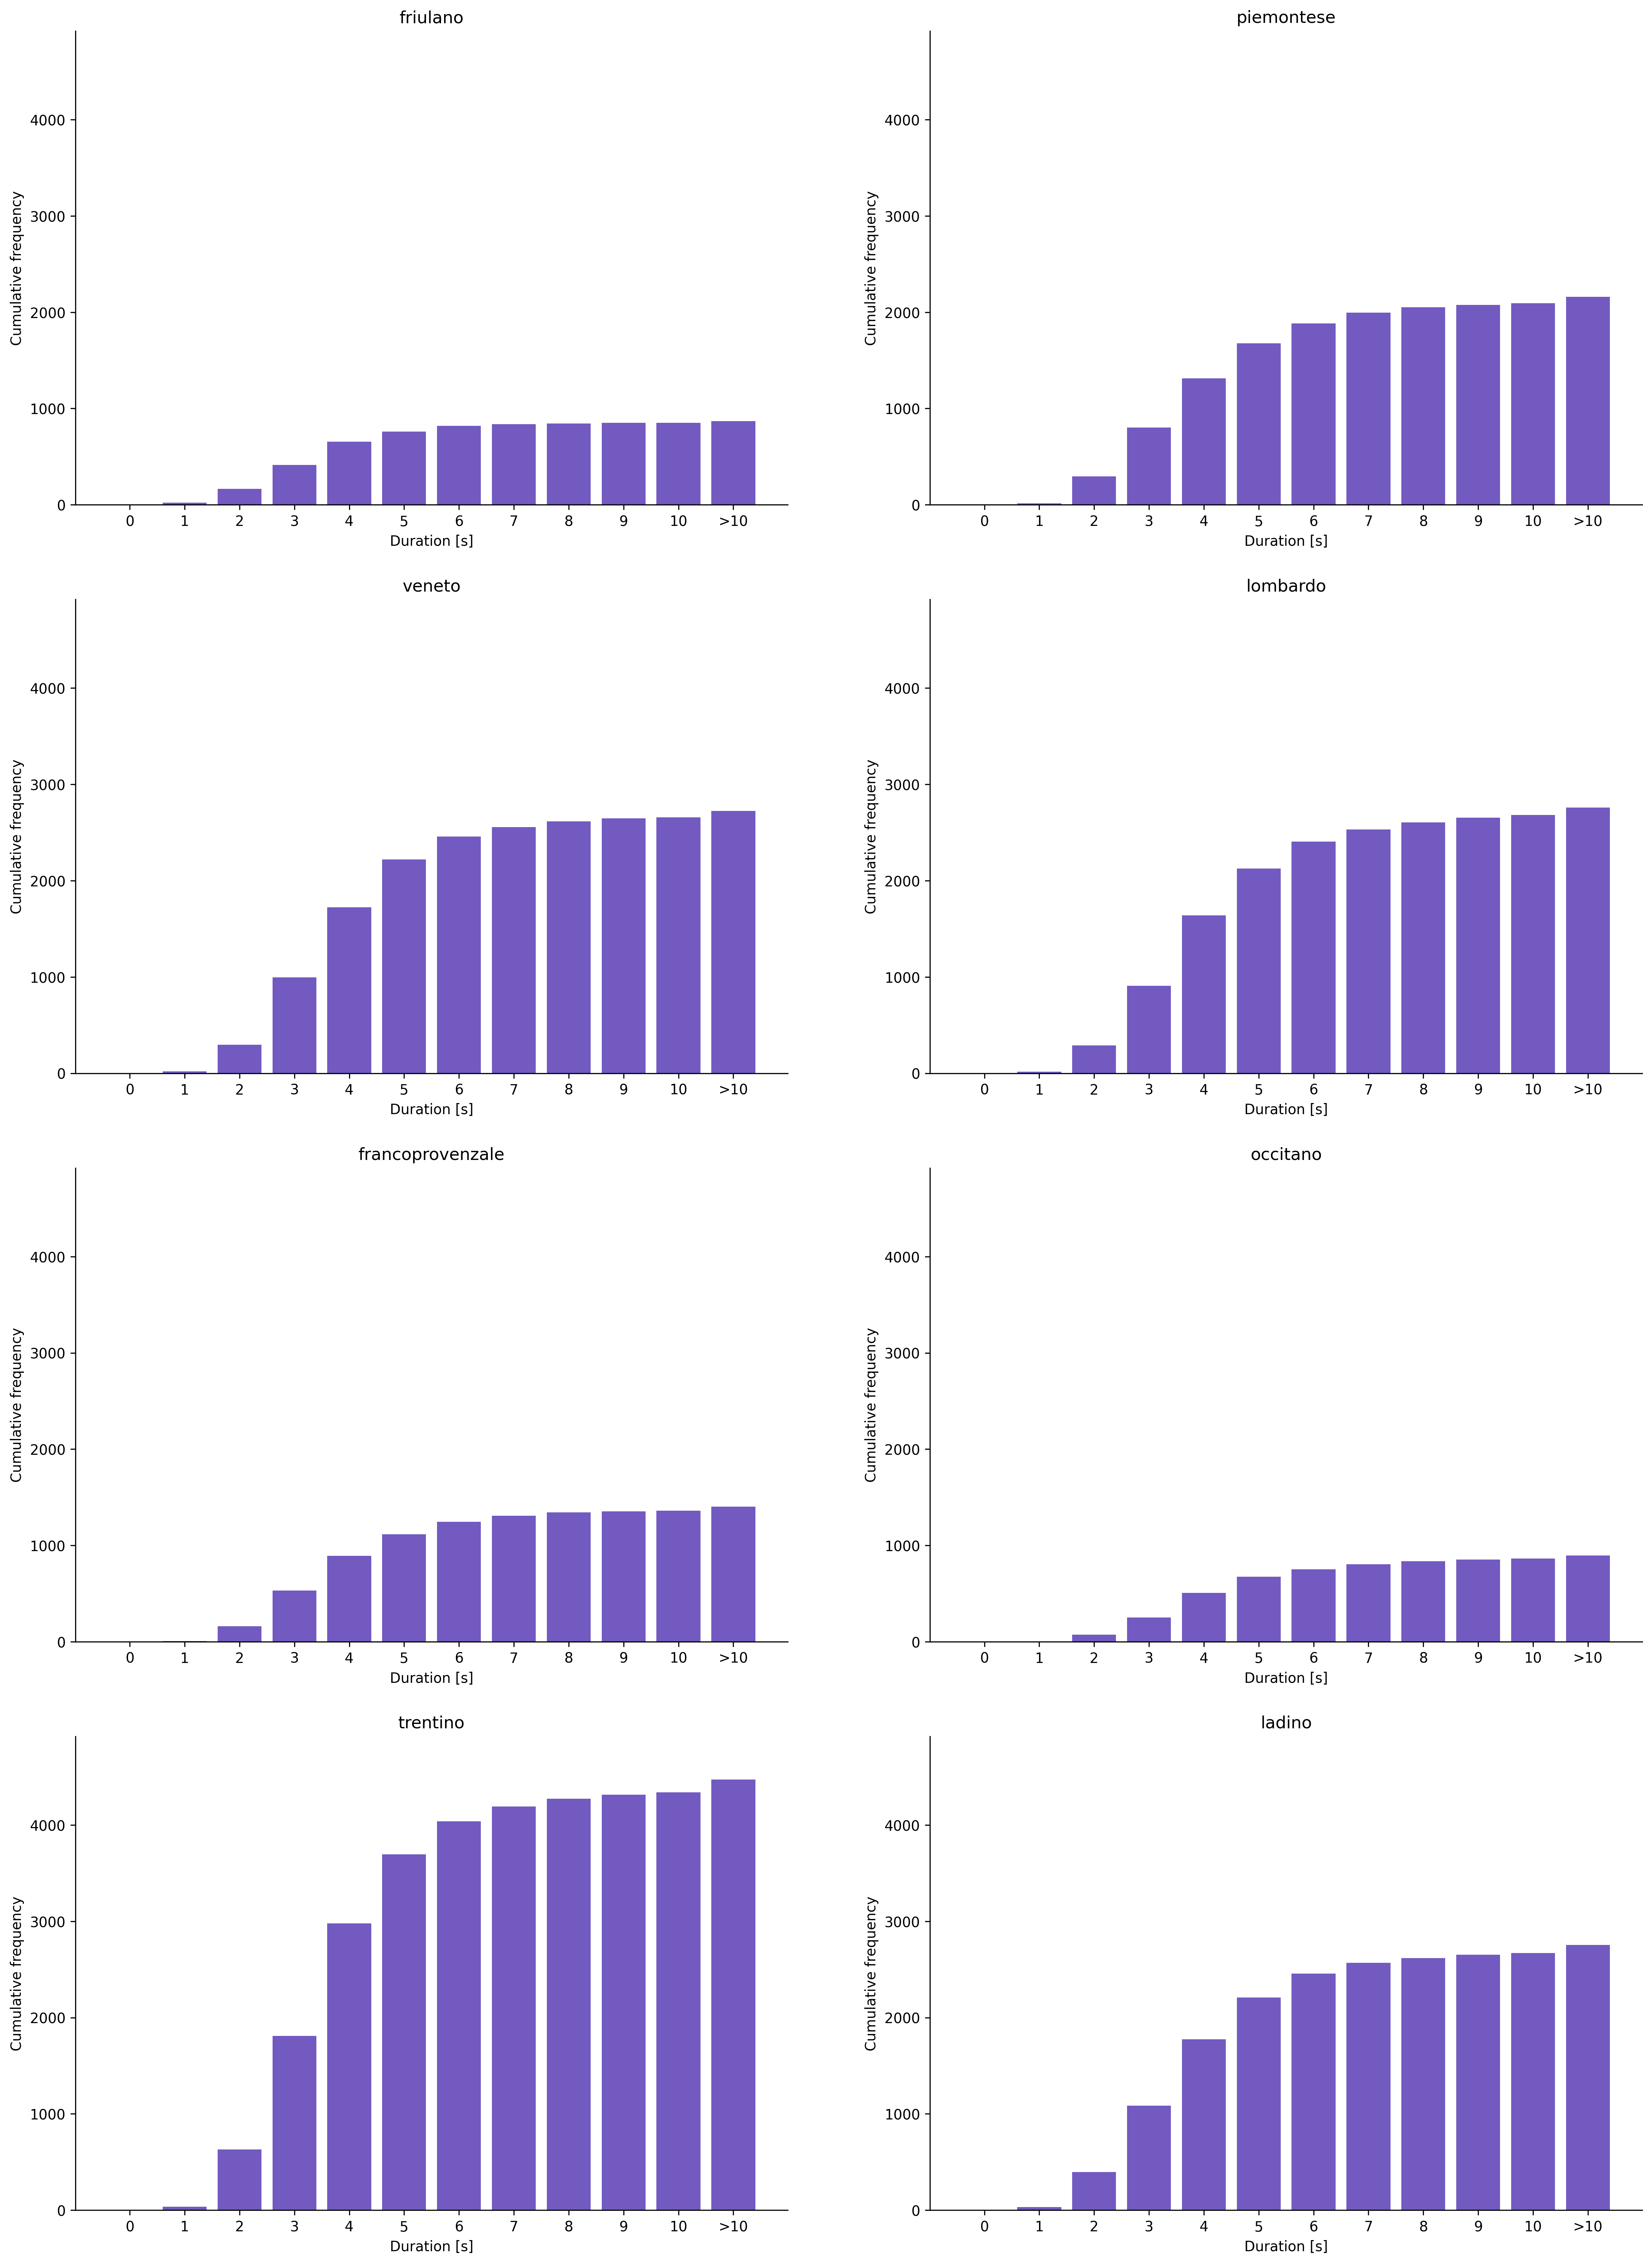

In [37]:
fig, axs = plt.subplots(*DEFAULT_DISPLAY_SHAPE, figsize = (DEFAULT_DISPLAY_SHAPE[1]*10, DEFAULT_DISPLAY_SHAPE[0]*7), dpi = DPI)

xAxis = [ str(i) for i in range(11) ] + ['>10']
maxFrequency = 0
dialectDurationsCDF = dict()

# Scan the dataset. We assume that each dialect's data is stored in a separated folder with the same name of the dialect
for dialect in DIALECTS :
    dirPath = f'./{dialect}/'
    # Isolate the files within the folder
    onlyFiles = [ f'{dirPath}{f}' for f in listdir(dirPath) if isfile(join(dirPath, f))]

    # Count the absolute frequency of each quantized duration (0 to 10+ seconds)
    durationsCDF = [ 0 for _ in range(12) ]
    for file in onlyFiles :
        seconds = int(wave.open(file, 'r').getnframes() / wave.open(file, 'r').getframerate())
        if seconds > 10 : seconds = 11
        for s in range(seconds, 12) : durationsCDF[s] += 1
    dialectDurationsCDF[dialect] = durationsCDF

    # Keep track of the highest frequency to scale the bar graphs
    maxFrequency = max(maxFrequency, max(durationsCDF))

# Plot the data
for i, dialect in enumerate(DIALECTS) :
    ax = axs[i] if DEFAULT_DISPLAY_SHAPE[1] == 1 else axs[i%DEFAULT_DISPLAY_SHAPE[0]][i//DEFAULT_DISPLAY_SHAPE[0]]
    ax.bar(xAxis, dialectDurationsCDF[dialect], color = DEFAULT_COLOR)
    ax.set_title(dialect, fontsize = AXES_TITLE_FONTSIZE)
    ax.set_xlabel('Duration [s]', fontsize = AXES_LABEL_FONTSIZE)
    ax.set_ylabel('Cumulative frequency', fontsize = AXES_LABEL_FONTSIZE)
    ax.spines[['right', 'top']].set_visible(False)

    # Scale the bar graph if COMPARABLE is True
    if COMPARABLE : ax.set_ylim(0, maxFrequency * 1.1)

# Remove the last subplot if there is an odd number of dialects
if DEFAULT_DISPLAY_SHAPE[1] == 2 and len(DIALECTS)%2 != 0 : axs[-1][-1].set_axis_off()

plt.show()

#### 3.2: Audio bitrate

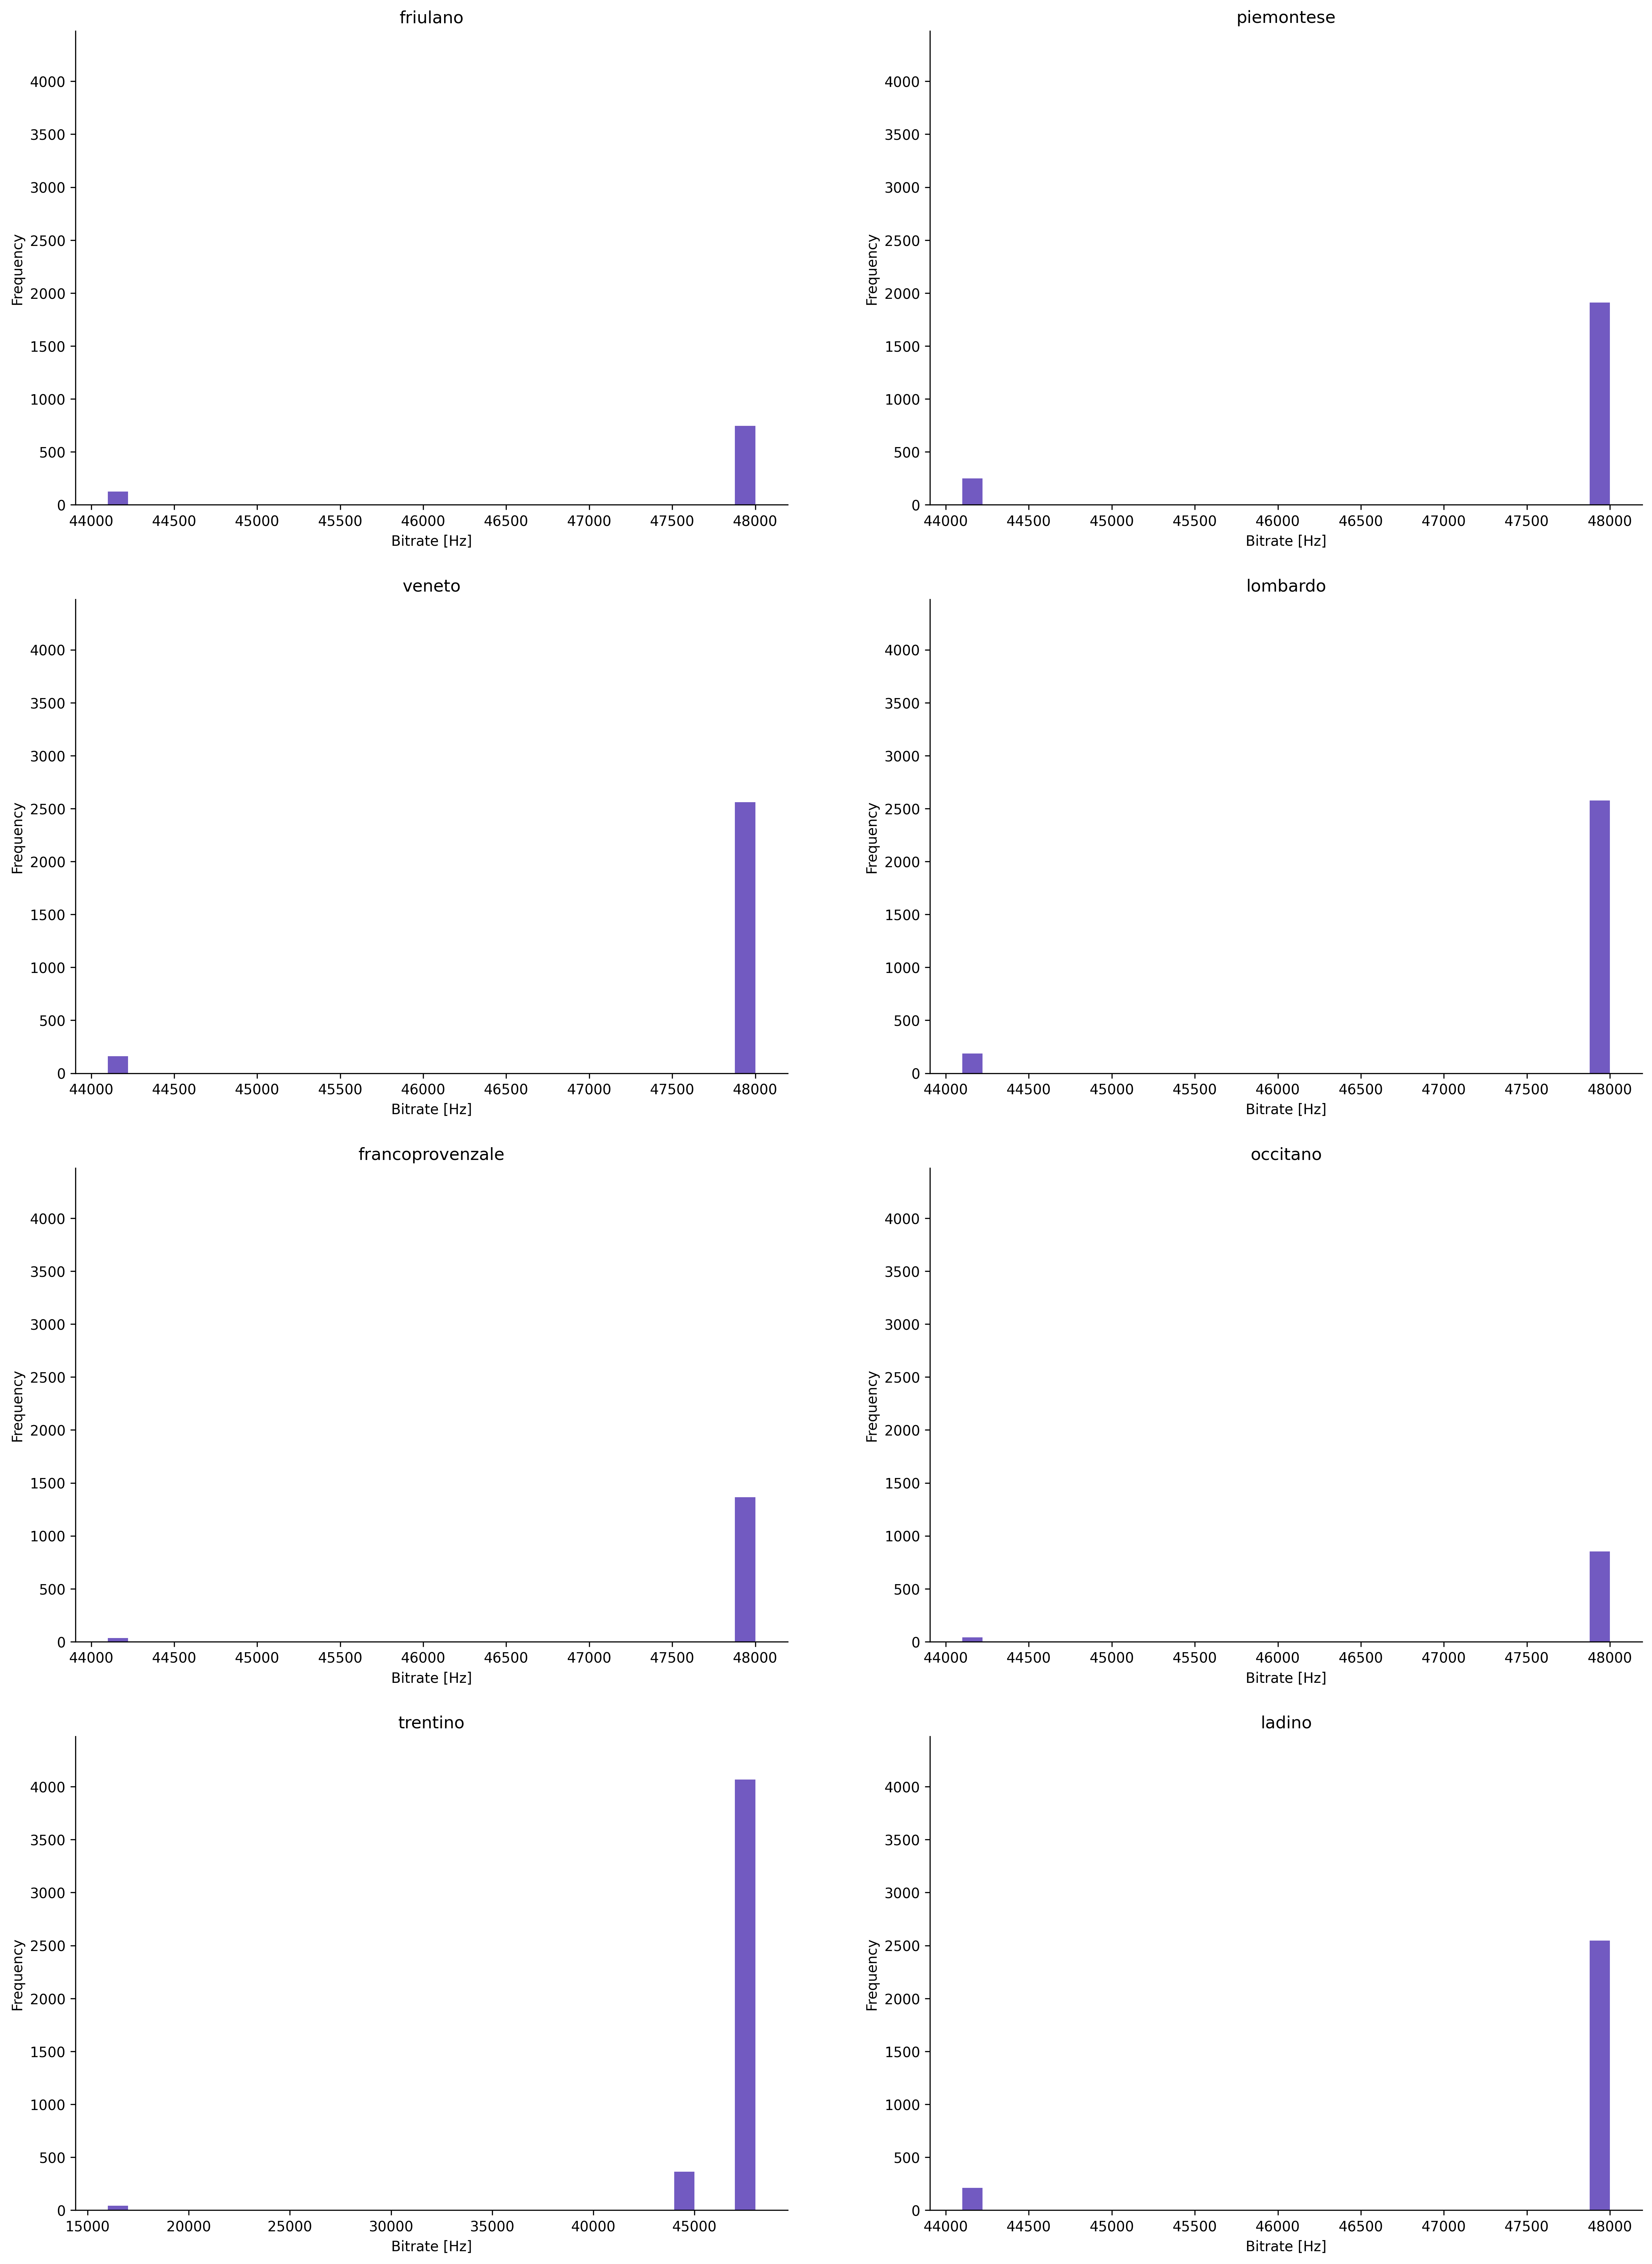

In [45]:
fig, axs = plt.subplots(*DEFAULT_DISPLAY_SHAPE, figsize = (DEFAULT_DISPLAY_SHAPE[1]*10, DEFAULT_DISPLAY_SHAPE[0]*7), dpi = DPI)

maxFrequency = 0
dialectNFrames = dict()

# Scan the dataset. We assume that each dialect's data is stored in a separated folder with the same name of the dialect
for dialect in DIALECTS :
    dirPath = f'./{dialect}/'
    # Isolate the files within the folder
    onlyFiles = [ f'{dirPath}{f}' for f in listdir(dirPath) if isfile(join(dirPath, f)) ]

    # Save the various framerates
    NFrames = [ wave.open(file, 'r').getframerate() for file in onlyFiles ]
    dialectNFrames[dialect] = NFrames

    # Keep track of the highest frequency to scale the histogram
    maxFrequency = max(maxFrequency, max(np.histogram(NFrames, bins=32)[0]))

# Plot the data
for i, dialect in enumerate(DIALECTS) :
    ax = axs[i] if DEFAULT_DISPLAY_SHAPE[1] == 1 else axs[i%DEFAULT_DISPLAY_SHAPE[0]][i//DEFAULT_DISPLAY_SHAPE[0]]
    ax.hist(dialectNFrames[dialect], bins = 32, color = DEFAULT_COLOR)
    ax.set_title(dialect, fontsize = AXES_TITLE_FONTSIZE)
    ax.set_xlabel('Bitrate [Hz]', fontsize = AXES_LABEL_FONTSIZE)
    ax.set_ylabel('Frequency', fontsize = AXES_LABEL_FONTSIZE)
    ax.spines[['right', 'top']].set_visible(False)


    # Scale the bar graph if COMPARABLE is True
    if COMPARABLE : ax.set_ylim(0, maxFrequency * 1.1)

# Remove the last subplot if there is an odd number of dialects
if DEFAULT_DISPLAY_SHAPE[1] == 2 and len(DIALECTS)%2 != 0 : axs[-1][-1].set_axis_off()

plt.show()


#### 3.3: Distribution across dialects and/or tasks

In [39]:
from matplotlib.colors import LogNorm

LOG_NORM = False # Log normalization can be useful in cases where some dialects are over-represented in the dataset

In [40]:
# Extract stastistics from the dataset: we want to compute the absolute frequency of each (dialect, task) combination
datasetStats = dict()

for dialect in DIALECTS :
    dirPath = f'./{dialect}/'
    dialectStats = { t : 0 for t in TASKS }
    # Isolate the files within the folder
    onlyFiles = [ f for f in listdir(dirPath) if isfile(join(dirPath, f)) ]
    for file in onlyFiles :
        if file[0] in TASKS : dialectStats[file[0]] += 1
    datasetStats[dialect] = dialectStats


##### 3.3.1: Distribution across dialects and tasks

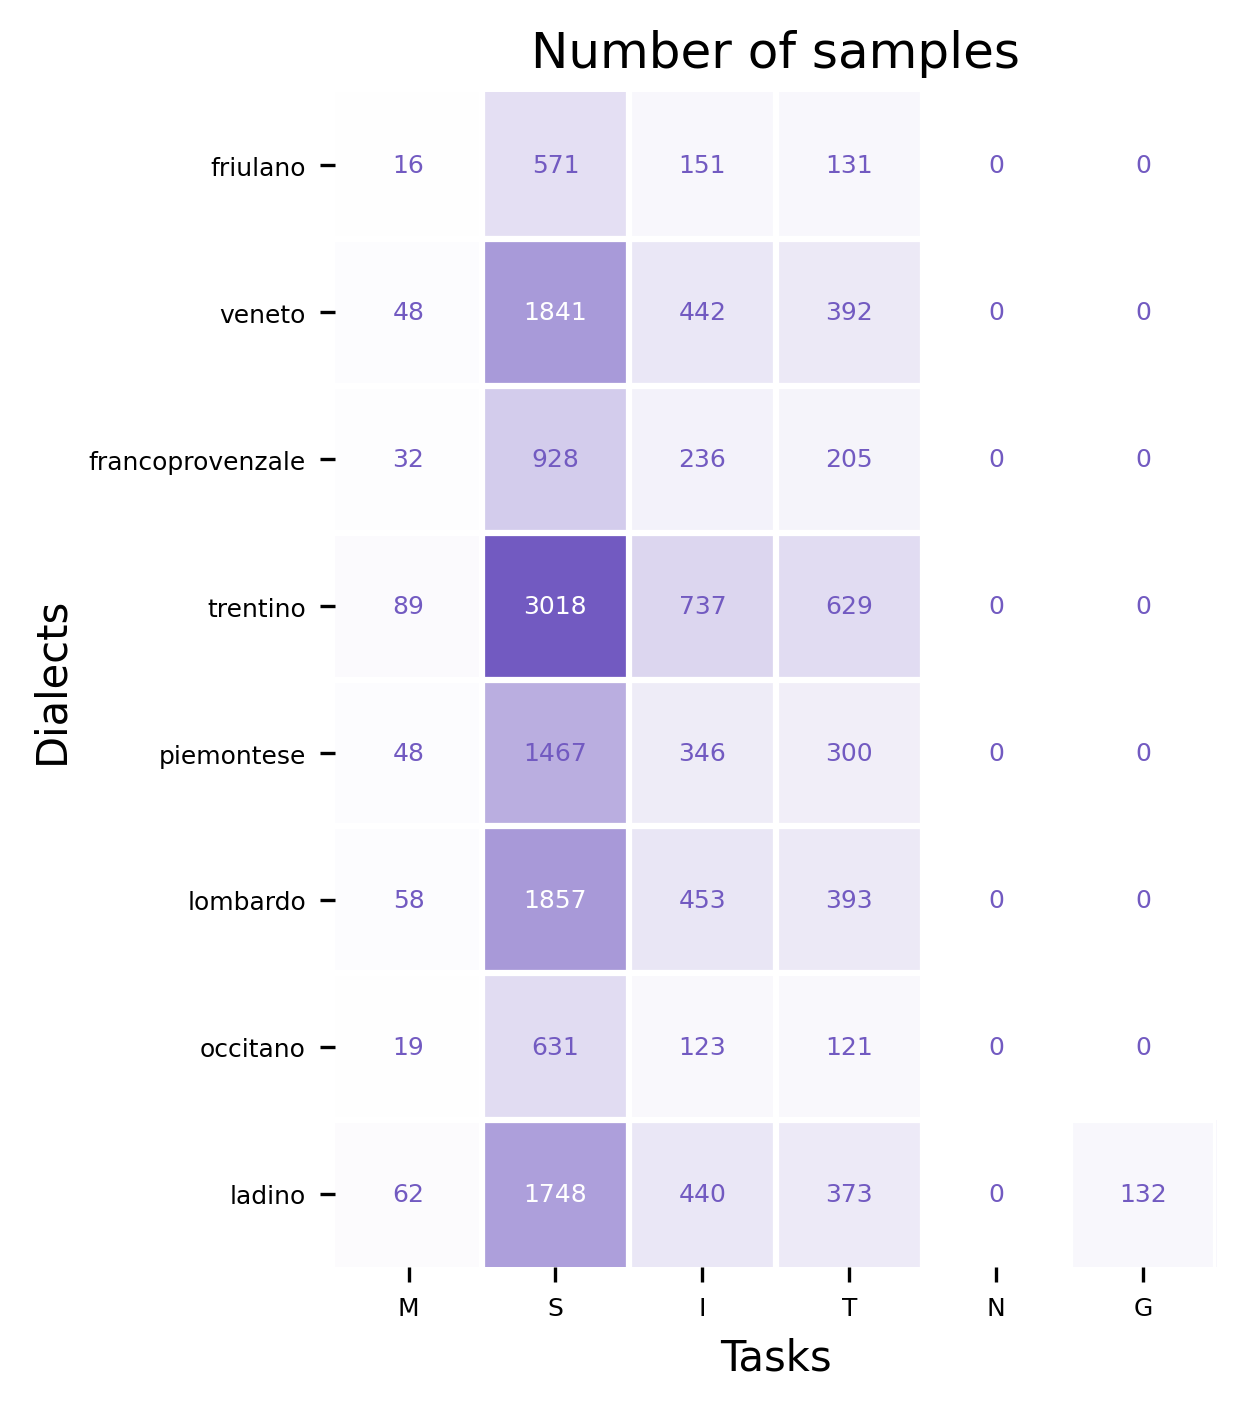

In [48]:
fig, ax = plt.subplots(dpi=DPI)

heatmap = np.array([ [ datasetStats[dialectName][task] for task in TASKS ] for dialectName in datasetStats ])
min_val, max_val = np.min(heatmap), np.max(heatmap)

if LOG_NORM : ax.imshow(heatmap, cmap=DEFAULT_CMAP, norm=LogNorm(vmax=max_val, vmin=min_val))
else : ax.imshow(heatmap, cmap=DEFAULT_CMAP)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(TASKS)), labels=TASKS, fontsize=AXES_TICKS_FONTSIZE)
ax.set_yticks(np.arange(len(DIALECTS)), labels=DIALECTS, fontsize=AXES_TICKS_FONTSIZE)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), ha="center")

# Loop over data dimensions and create text annotations.
for i in range(len(DIALECTS)):
    for j in range(len(TASKS)):
        if heatmap[i,j] > (max_val + min_val) / 2 : ax.text(j, i, heatmap[i][j], ha="center", va="center", color="white", fontsize=AXES_TICKS_FONTSIZE)
        else : ax.text(j, i, heatmap[i][j], ha="center", va="center", color=DEFAULT_COLOR, fontsize=AXES_TICKS_FONTSIZE)

# Display white horizontal and vertical lines to separate the heatmap squares   
ax.hlines(np.arange(0.5, len(DIALECTS)-0.5), -0.5, len(TASKS)-0.5, color='white')
ax.vlines(np.arange(0.5, len(DIALECTS)-0.5), -0.5, len(DIALECTS)-0.5, color='white')

ax.set_xlim = (-0.5, len(TASKS)+0.5)
ax.set_xlabel('Tasks', fontsize = AXES_LABEL_FONTSIZE)
ax.set_ylabel('Dialects', fontsize = AXES_LABEL_FONTSIZE)
ax.set_title('Number of samples', fontsize = AXES_TITLE_FONTSIZE)
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

fig.tight_layout()
plt.show()


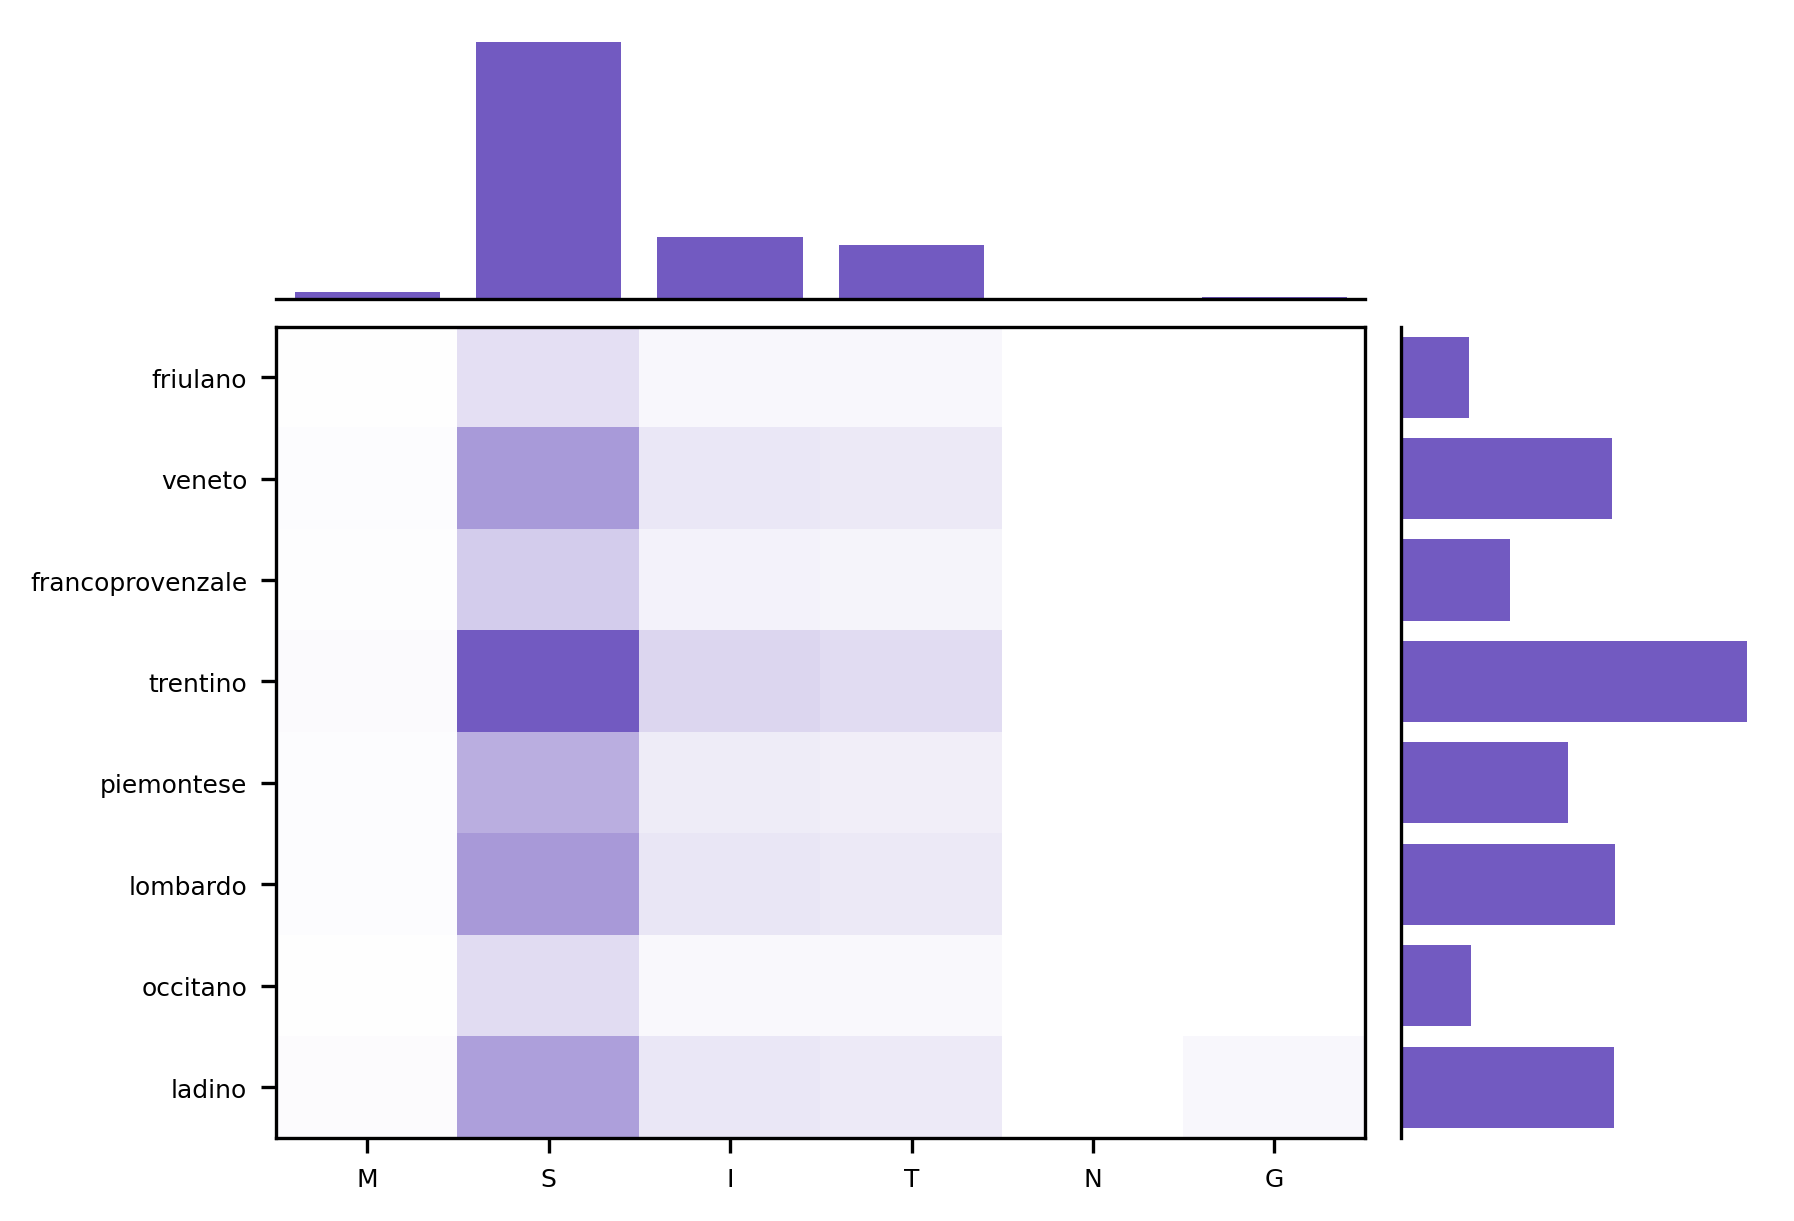

In [42]:
acrossDialects = np.sum(heatmap, axis=1)
acrossTasks = np.sum(heatmap, axis=0)

fig = plt.figure(dpi = DPI)

# Subdivide the figure into a grid of subgraphs
gs = fig.add_gridspec(2, 2, width_ratios=(3, 1), height_ratios=(1, 3), wspace=0.05, hspace=0.05)

# Main heatmap
ax = fig.add_subplot(gs[1, 0])
ax.imshow(heatmap, cmap=DEFAULT_CMAP, aspect='auto')
ax.set_xticks(list(range(len(TASKS))), TASKS, fontsize = AXES_TICKS_FONTSIZE)
ax.set_yticks(list(range(len(DIALECTS))), DIALECTS, fontsize = AXES_TICKS_FONTSIZE)

# Sum across dialects
ax_histx = fig.add_subplot(gs[0, 0])
ax_histx.bar(TASKS, acrossTasks, color=DEFAULT_COLOR, linewidth = 1)
ax_histx.spines[['right', 'top', 'left']].set_visible(False)
ax_histx.set_xticks([],[])
ax_histx.set_yticks([],[])
ax_histx.set_xlim([-0.5,len(TASKS)-0.5])

# Sum across tasks
ax_histy = fig.add_subplot(gs[1, 1])
ax_histy.barh(DIALECTS, acrossDialects[::-1], color=DEFAULT_COLOR)
ax_histy.spines[['right', 'top', 'bottom']].set_visible(False)
ax_histy.set_xticks([],[])
ax_histy.set_yticks([],[])
ax_histy.set_ylim([-0.5,len(DIALECTS)-0.5])

plt.show()

##### 3.3.2: Distribution across tasks

AttributeError: 'Figure' object has no attribute 'spines'

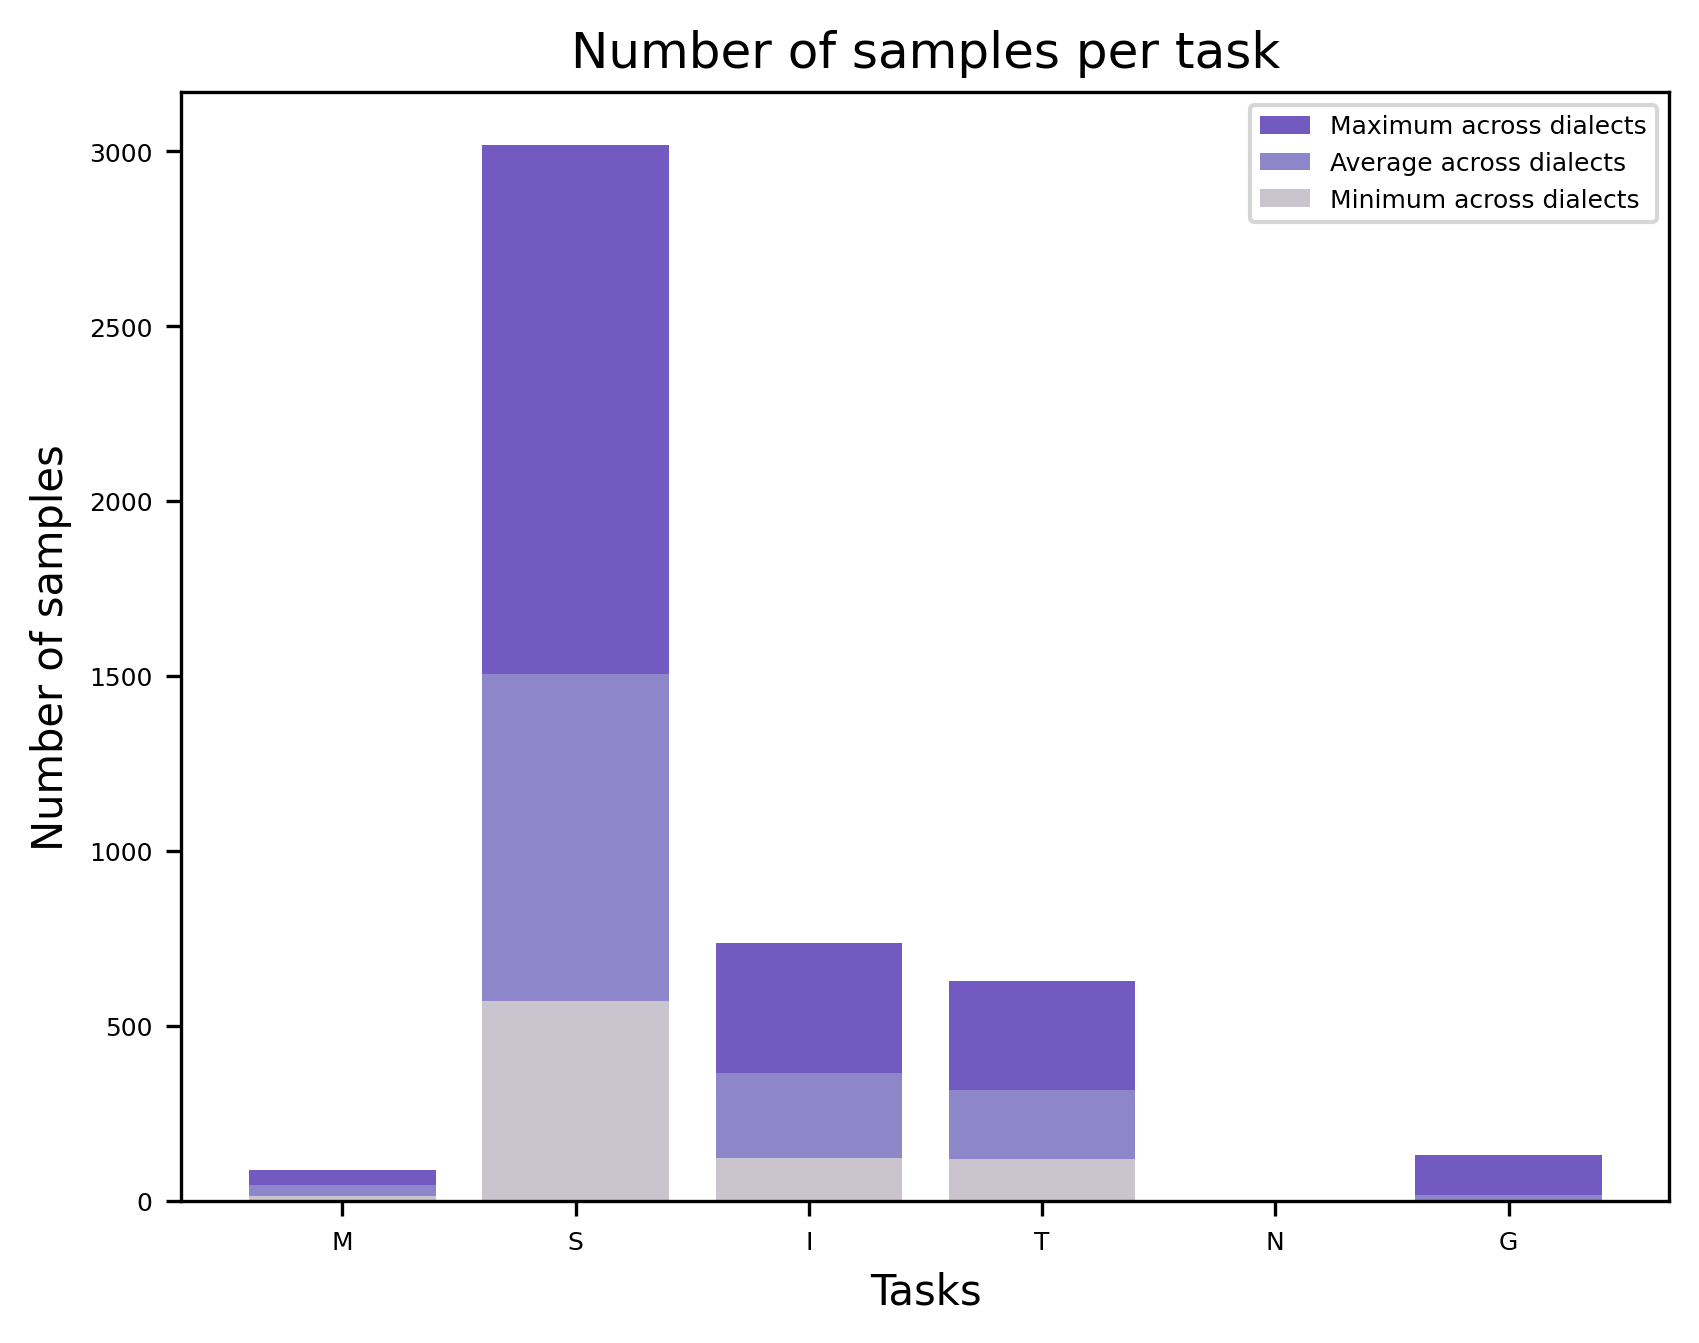

In [50]:
fig = plt.figure(dpi = DPI)

minSamples = heatmap.min(axis=0)
averageSamples = heatmap.mean(axis=0)
maxSamples = heatmap.max(axis=0)

plt.bar(TASKS, maxSamples, color=PALETTE[1])
plt.bar(TASKS, averageSamples, color=PALETTE[2])
plt.bar(TASKS, minSamples, color=PALETTE[3])
plt.ylabel('Number of samples', fontsize=AXES_LABEL_FONTSIZE)
plt.xlabel('Tasks', fontsize=AXES_LABEL_FONTSIZE)
plt.title('Number of samples per task', fontsize=AXES_TITLE_FONTSIZE)
plt.xticks(fontsize=AXES_TICKS_FONTSIZE)
plt.yticks(fontsize=AXES_TICKS_FONTSIZE)
plt.legend(['Maximum across dialects', 'Average across dialects', 'Minimum across dialects'], fontsize=AXES_TICKS_FONTSIZE)
plt.show()

##### 3.3.3: Distribution across dialects

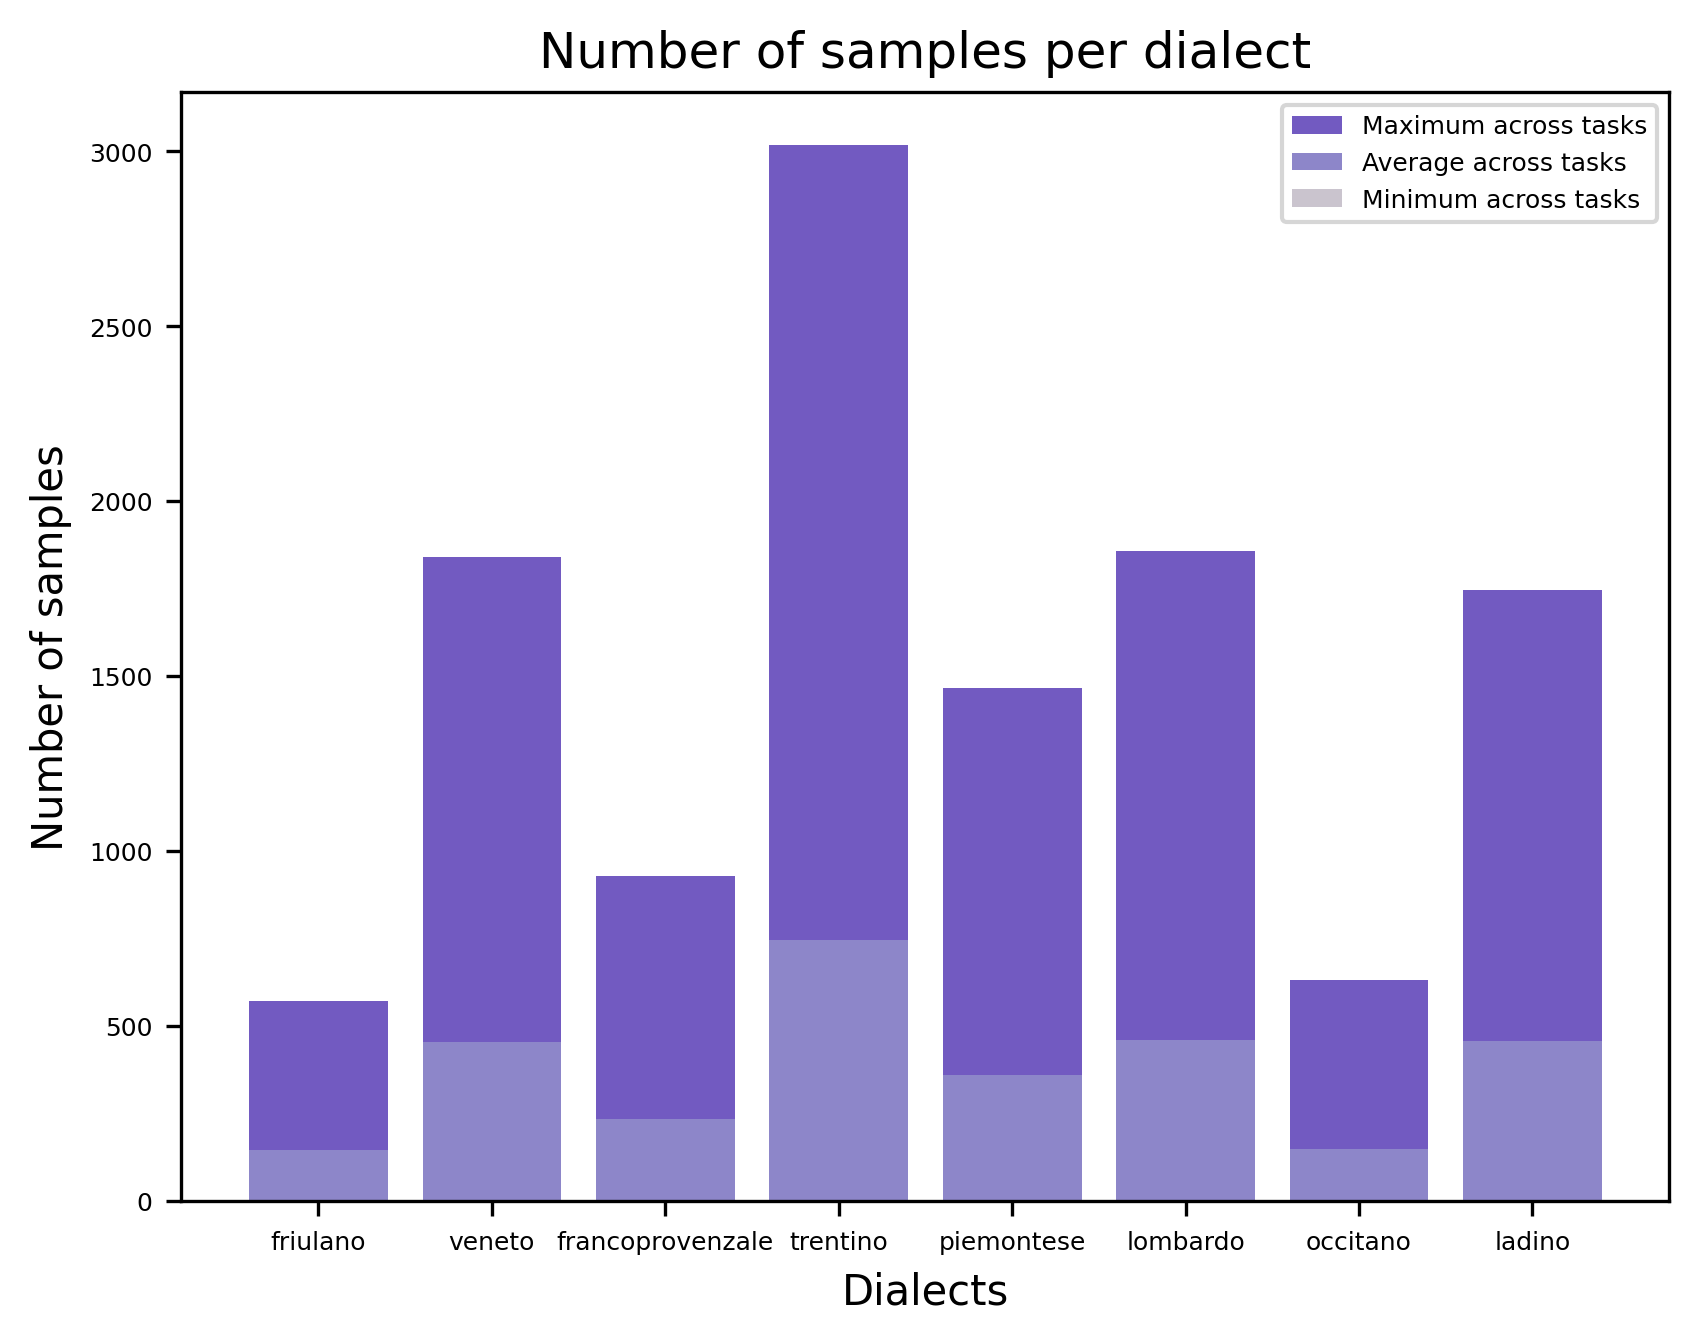

In [44]:
fig = plt.figure(dpi = DPI)

minSamples = heatmap.min(axis=1)
averageSamples = heatmap.mean(axis=1)
maxSamples = heatmap.max(axis=1)

plt.bar(DIALECTS, maxSamples, color=PALETTE[1])
plt.bar(DIALECTS, averageSamples, color=PALETTE[2])
plt.bar(DIALECTS, minSamples, color=PALETTE[3])
plt.ylabel('Number of samples', fontsize=AXES_LABEL_FONTSIZE)
plt.xlabel('Dialects', fontsize=AXES_LABEL_FONTSIZE)
plt.title('Number of samples per dialect', fontsize=AXES_TITLE_FONTSIZE)
plt.xticks(fontsize=AXES_TICKS_FONTSIZE)
plt.yticks(fontsize=AXES_TICKS_FONTSIZE)
plt.legend(['Maximum across tasks', 'Average across tasks', 'Minimum across tasks'], fontsize=AXES_TICKS_FONTSIZE)
plt.show()